In [119]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading

In [139]:
df = pd.read_csv("loan_data.csv")
df.head()

person_age person_gender person_education  person_income  person_emp_exp person_home_ownership  loan_amnt loan_intent  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score previous_loan_defaults_on_file  loan_status
0        22.0        female           Master        71948.0               0                  RENT    35000.0    PERSONAL          16.02                 0.49                         3.0           561                             No            1
1        21.0        female      High School        12282.0               0                   OWN     1000.0   EDUCATION          11.14                 0.08                         2.0           504                            Yes            0
2        25.0        female      High School        12438.0               3              MORTGAGE     5500.0     MEDICAL          12.87                 0.44                         3.0           635                             No            1
3        23.0        female         Bachelor        79753.0               0                  RENT    35000.0     MEDICAL          15.23                 0.44                         2.0           675                             No            1
4        24.0          male           Master        66135.0               1                  RENT    35000.0     MEDICAL          14.27                 0.53                         4.0           586                             No            1

Our data contains:
- `person_age` : Age of the person
- `person_gender` : Gender of the person
- `person_education` : Highest Education level
- `person_income` : Annual income
- `person_emp_exp` : Years of employment experience
- `person_home_ownership`: Home ownership status (e.g., rent, own, mortgage)
- `loan_amnt` : Loan amount requested
- `loan_intent` : Purpose of the loan
- `loan_int_rate`	: Loan interest rate
- `loan_percent_income`:	Loan amount as a percentage of annual income
- `cb_person_cred_hist_length` :	Length of credit history in years
- `credit_score`	Credit score of the person
- `previous_loan_defaults_on_file`: 	Indicator of previous loan defaults
- `loan_status` : Loan approval status: 1 = approved; 0 = rejected

In [121]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score   loan_status
count  45000.000000   4.500000e+04    45000.000000  45000.000000   45000.000000         45000.000000                45000.000000  45000.000000  45000.000000
mean      27.764178   8.031905e+04        5.410333   9583.157556      11.006606             0.139725                    5.867489    632.608756      0.222222
std        6.045108   8.042250e+04        6.063532   6314.886691       2.978808             0.087212                    3.879702     50.435865      0.415744
min       20.000000   8.000000e+03        0.000000    500.000000       5.420000             0.000000                    2.000000    390.000000      0.000000
25%       24.000000   4.720400e+04        1.000000   5000.000000       8.590000             0.070000                    3.000000    601.000000      0.000000
50%       26.000000   6.704800e+04        4.000000   8000.000000      11.010000             0.120000                    4.000000    640.000000      0.000000
75%       30.000000   9.578925e+04        8.000000  12237.250000      12.990000             0.190000                    8.000000    670.000000      0.000000
max      144.000000   7.200766e+06      125.000000  35000.000000      20.000000             0.660000                   30.000000    850.000000      1.000000

In [140]:
# Rename the columns 
df.columns = ['age', 'gender', 'education', 'income',
       'emp_exp', 'home', 'amnt', 'intent',
       'rate', 'percentage', 'cred_hist',
       'score', 'defaults', 'status']              

In [141]:
# Convert categorical columns
quali = [ 'gender', 'education','home', 'intent','defaults', 'status']
quanti = ['age','income','emp_exp', 'amnt','rate', 'percentage', 'cred_hist','score']

for col in quali:
    df[col] = pd.Categorical(df[col],ordered=False)

# Data Cleaning

In [144]:
print("Number of missing value: ",np.sum(df.isnull().sum()),", Number of duplicated row: ",df.duplicated().sum())

Number of missing value:  0 , Number of duplicated row:  0


**Comment**: According to our analysis, it seems that the dataset is clean.

# Exploratory Statistics

## Uni-dimensional Study

### Categorical variable

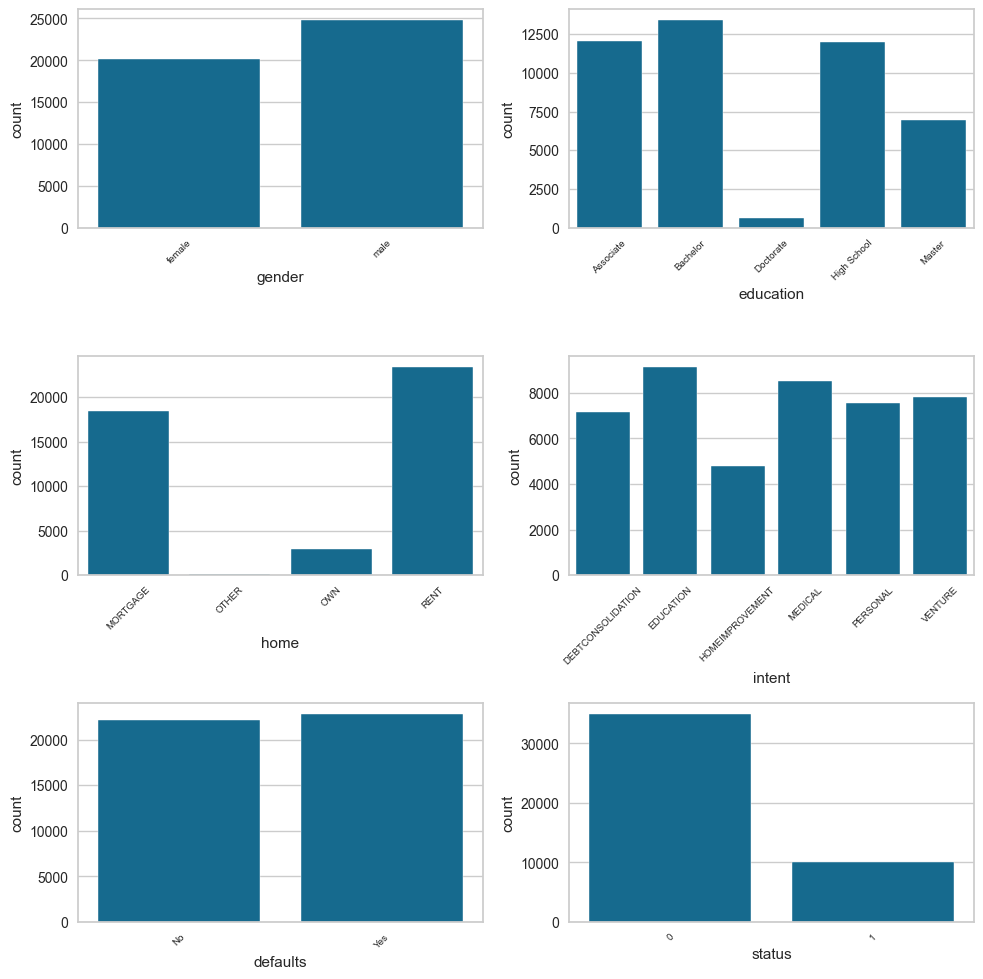

In [129]:
df_quanti = df[quanti]
import seaborn as sns
fig = plt.subplots(3,2,figsize=(10,10))
for i,col in enumerate(quali):
    plt.subplot(3,2,i+1)
    sns.barplot(df[col].value_counts())
    plt.xticks(rotation=45,fontsize=7)
plt.tight_layout()
plt.show()

**Comment:**
- We have an almost equal proportion between men and women in our dataset, as well as the previous loan defaults.
- Our dataset has a low number of people having own home.
- The rate of loan approval is quite low.


### Quantitative variable

In [131]:
df_quanti = df[quanti]
df_quanti.head()

age   income  emp_exp     amnt   rate  percentage  cred_hist  score
0  22.0  71948.0        0  35000.0  16.02        0.49        3.0    561
1  21.0  12282.0        0   1000.0  11.14        0.08        2.0    504
2  25.0  12438.0        3   5500.0  12.87        0.44        3.0    635
3  23.0  79753.0        0  35000.0  15.23        0.44        2.0    675
4  24.0  66135.0        1  35000.0  14.27        0.53        4.0    586

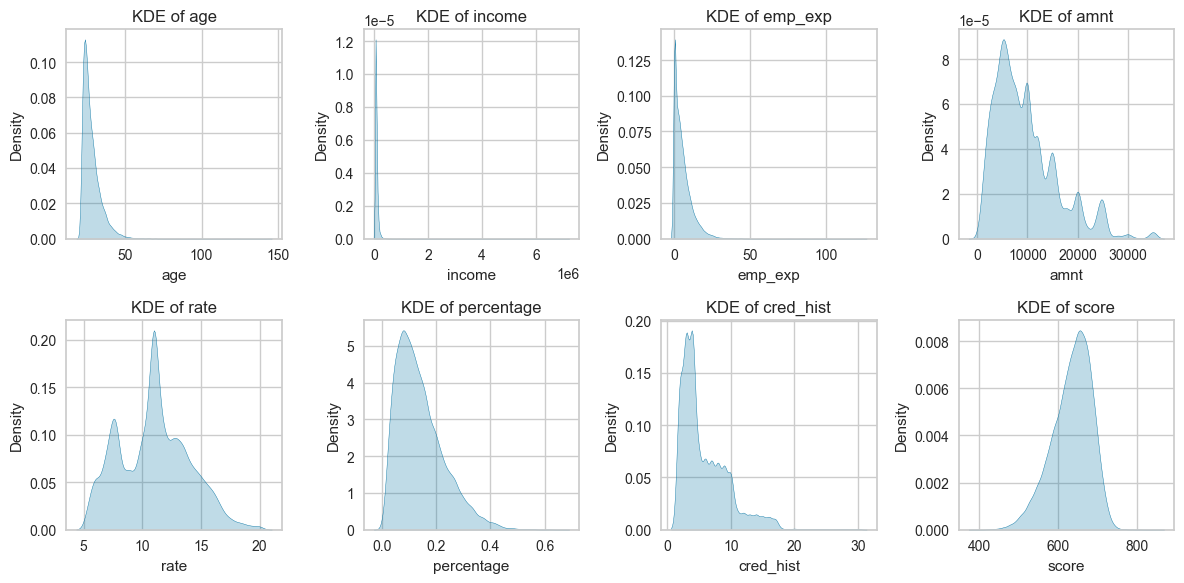

In [132]:
fig = plt.subplots(2,4,figsize=(12,6))
for i,column in enumerate(quanti):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df[column].astype('float'), fill=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'KDE of {column}')
plt.tight_layout()
plt.show()

**Comment**: There are a lot of outliers for age, income and number of exprienence years.

In [145]:

df_potential_anomalies = df[['age','income','emp_exp','cred_hist']][(df['age']>100) ]
print(df_potential_anomalies.shape[0]/df.shape[0])


**Comment**: As the number of "potential" anomalies is 0.0015% of total dataset, removing these individuals should not impact the dataset.

In [146]:
# Removing the the potential anomalies.
df_clean =df.merge(df_potential_anomalies, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

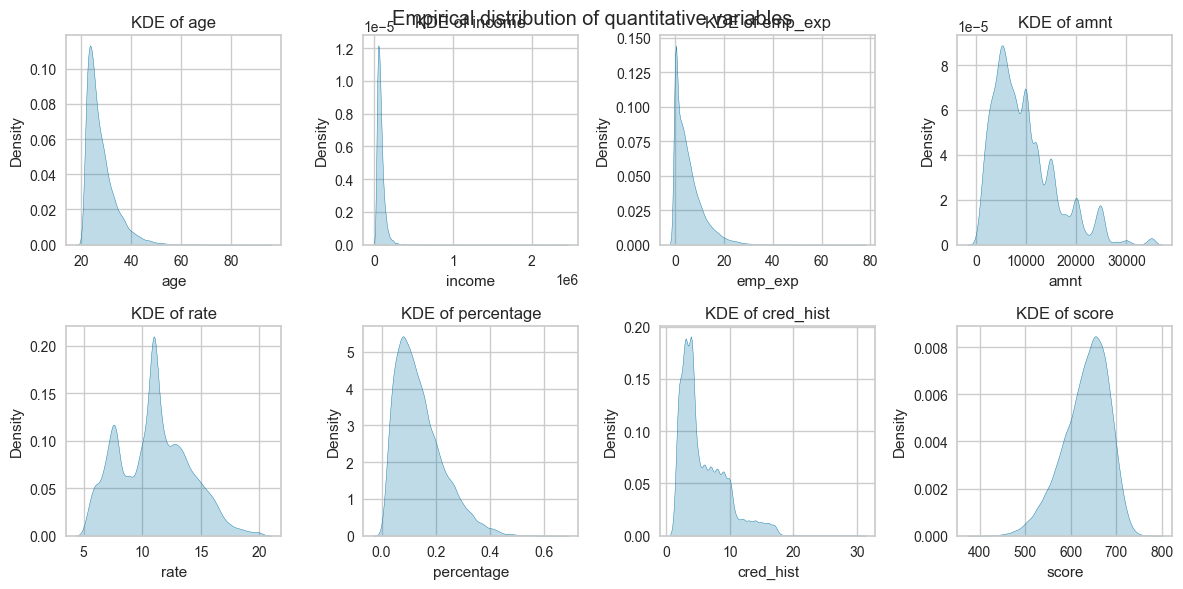

In [148]:
fig = plt.subplots(2,4,figsize=(12,6))
for i,column in enumerate(quanti):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df_clean[column].astype('float'), fill=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'KDE of {column}')
plt.tight_layout()
plt.suptitle('Empirical distribution of quantitative variables')
plt.show()

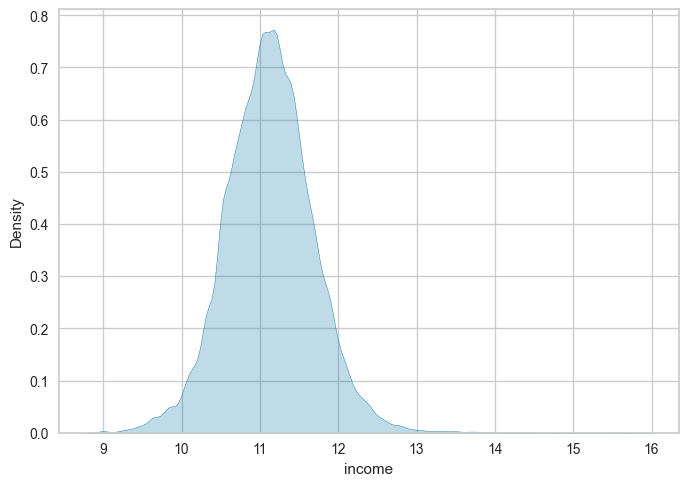

In [149]:
# Gaussien transformation for the 'income' variable
var = 'income'
sns.kdeplot(np.log(df[var]),label='var',fill=True)
plt.show()
df_clean['Lincome'] = np.log(df_clean['income'])
del df_clean['income']

quanti=['age', 'emp_exp', 'amnt','rate', 'percentage',
       'cred_hist', 'score','Lincome']

## Multi-dimensional Study

### Categorical vs Categorical

#### MCA (multiple correspendence analysis)


In [24]:
df_quali=df_clean[quali]
df_quali.set_index('status')


gender    education      home             intent defaults
status                                                           
1       female       Master      RENT           PERSONAL       No
0       female  High School       OWN          EDUCATION      Yes
1       female  High School  MORTGAGE            MEDICAL       No
1       female     Bachelor      RENT            MEDICAL       No
1         male       Master      RENT            MEDICAL       No
...        ...          ...       ...                ...      ...
1         male    Associate      RENT            MEDICAL       No
1       female    Associate      RENT    HOMEIMPROVEMENT       No
1         male    Associate      RENT  DEBTCONSOLIDATION       No
1         male     Bachelor      RENT          EDUCATION       No
1         male  High School      RENT  DEBTCONSOLIDATION       No

[44992 rows x 5 columns]

Multiple Correspondance Analysis (MCA) is a data analysis technique for reducing dimensionality among qualitative variables.
It can minimize intra class variance and maximize inter class variance. It is similar to the Principle Components Analysis (PCA), but uses a definition of the distance between individuals and between classes that takes into consideration the rarity of the class.

In [25]:
count=0 #21
for q in quali:
    if q!="status":
        print(df_quali[q].value_counts())
        print("-------")

gender
male      24835
female    20157
Name: count, dtype: int64
-------
education
Bachelor       13396
Associate      12026
High School    11969
Master          6980
Doctorate        621
Name: count, dtype: int64
-------
home
RENT        23439
MORTGAGE    18485
OWN          2951
OTHER         117
Name: count, dtype: int64
-------
intent
EDUCATION            9151
MEDICAL              8547
VENTURE              7815
PERSONAL             7551
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
-------
defaults
Yes    22856
No     22136
Name: count, dtype: int64
-------


In [26]:
import prince
mca = prince.MCA(
    n_components=20,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

df_quali_no_status = df_quali.drop('status',axis=1)
mca = mca.fit(df_quali_no_status)

In [27]:
print(mca.eigenvalues_)
print(mca.percentage_of_variance_)

[2.42260182e-01 2.17790272e-01 2.09181829e-01 2.03546317e-01
 2.01316515e-01 2.01009298e-01 2.00396069e-01 1.98954622e-01
 1.98155083e-01 1.97582336e-01 1.94566824e-01 1.93263102e-01
 1.75450837e-01 1.66526713e-01 1.18533428e-33 9.92565750e-34
 3.00393677e-34 6.33116775e-35]
[8.65214935e+00 7.77822399e+00 7.47077960e+00 7.26951132e+00
 7.18987554e+00 7.17890350e+00 7.15700248e+00 7.10552221e+00
 7.07696727e+00 7.05651200e+00 6.94881513e+00 6.90225365e+00
 6.26610132e+00 5.94738262e+00 4.23333671e-32 3.54487768e-32
 1.07283456e-32 2.26113134e-33]


In [28]:
help(prince.MCA)

Help on class MCA in module prince.mca:

class MCA(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin, prince.ca.CA)
 |  MCA(n_components=2, n_iter=10, copy=True, check_input=True, random_state=None, engine='sklearn', one_hot=True, correction=None)
 |
 |  Method resolution order:
 |      MCA
 |      sklearn.base.BaseEstimator
 |      sklearn.utils._estimator_html_repr._HTMLDocumentationLinkMixin
 |      sklearn.utils._metadata_requests._MetadataRequester
 |      sklearn.base.TransformerMixin
 |      sklearn.utils._set_output._SetOutputMixin
 |      prince.ca.CA
 |      prince.utils.EigenvaluesMixin
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, n_components=2, n_iter=10, copy=True, check_input=True, random_state=None, engine='sklearn', one_hot=True, correction=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  column_coordinates(self, X)
 |      The column principal coordinates.
 |
 |  column_cosine_similarities(self, 

In [29]:
display(mca.eigenvalues_summary)

mca.scree_plot()

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.242         8.65%                      8.65%
1              0.218         7.78%                     16.43%
2              0.209         7.47%                     23.90%
3              0.204         7.27%                     31.17%
4              0.201         7.19%                     38.36%
5              0.201         7.18%                     45.54%
6              0.200         7.16%                     52.70%
7              0.199         7.11%                     59.80%
8              0.198         7.08%                     66.88%
9              0.198         7.06%                     73.94%
10             0.195         6.95%                     80.88%
11             0.193         6.90%                     87.79%
12             0.175         6.27%                     94.05%
13             0.167         5.95%                    100.00%
14             0.000         0.00%                    100.00%
15             0.000         0.00%                    100.00%
16             0.000         0.00%                    100.00%
17             0.000         0.00%                    100.00%

alt.Chart(...)

In [30]:
def plot_mca(ax1=0, ax2=1, mca=mca, data=df_quali_no_status,color='status'):
    dataset = mca.transform(data)
    dataset.reset_index(inplace=True)
    sns.scatterplot(data = dataset,
                  x = ax1, y = ax2,
                  hue = df_quali[color])
    
    plt.xlabel('Component {} — {:.2f}%'.format(ax1, mca.percentage_of_variance_[ax1]))
    plt.ylabel('Component {} — {:.2f}%'.format(ax2, mca.percentage_of_variance_[ax2]))
    plt.grid(True)
    plt.show()

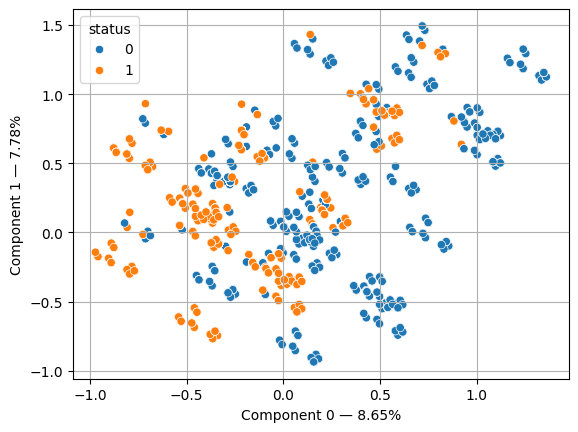

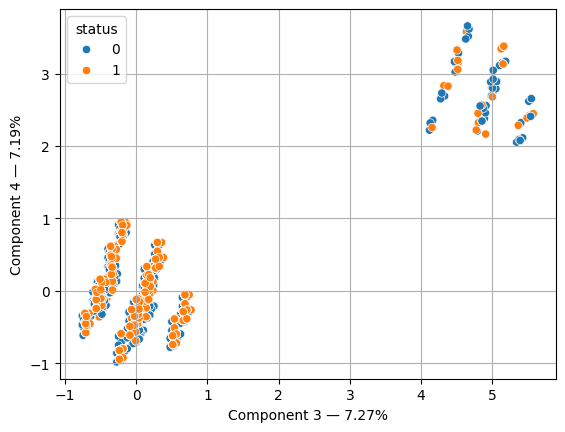

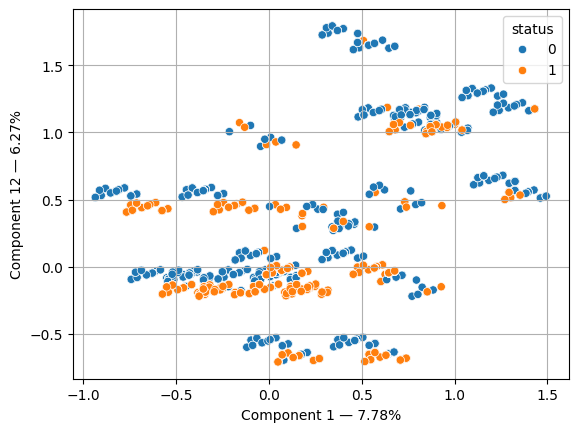

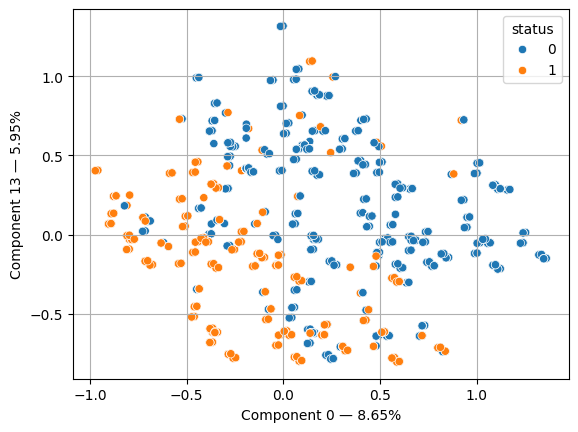

In [31]:
plot_mca(0,1)
plot_mca(3,4)
plot_mca(1,12)
plot_mca(0,13)

An observation on plan generated by components 0 and 13 shows that loan_status_yes and loan_status_no are resonably separable.

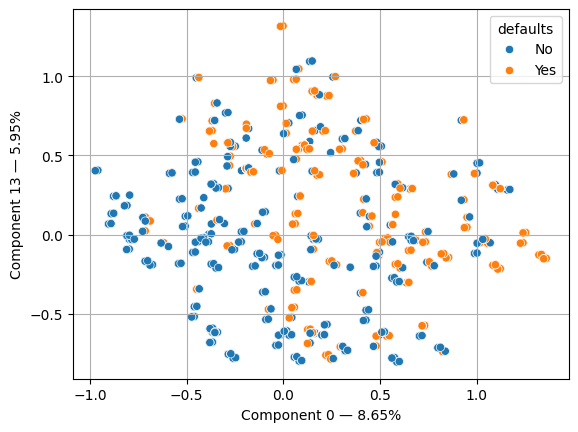

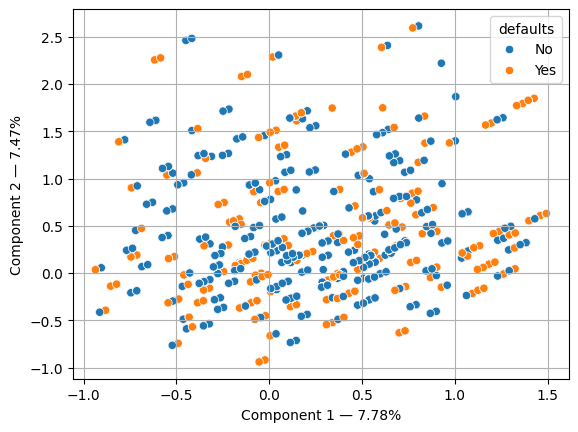

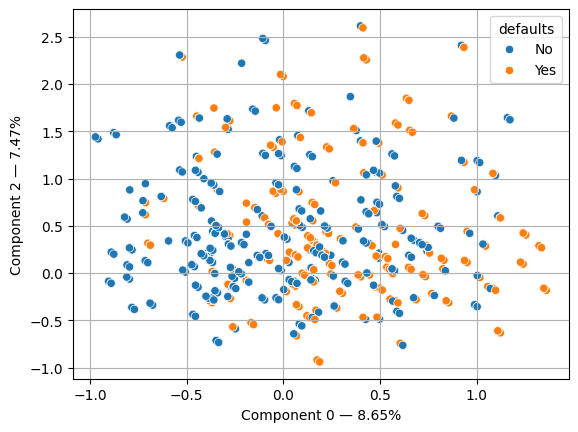

In [32]:
plot_mca(0,13,color = 'defaults' )
plot_mca(1,2,color = 'defaults')
plot_mca(0,2,color = 'defaults')

An observation on plane generated by components 0,1 and 0,2 show that previous_loan_defaults_yes and previous_loan_defaults_no are well separable.

In [33]:
# Contribution of columns to components

contrib = mca.column_contributions_.style.format('{:.1%}')
display(contrib.highlight_max(color='orange').highlight_min(color='lightblue'))

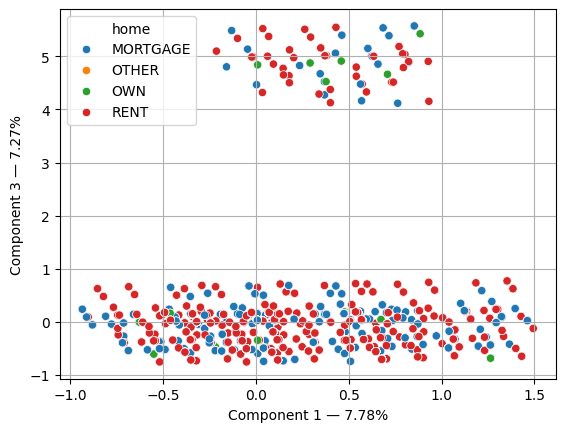

In [34]:
plot_mca(1,3,color='home')

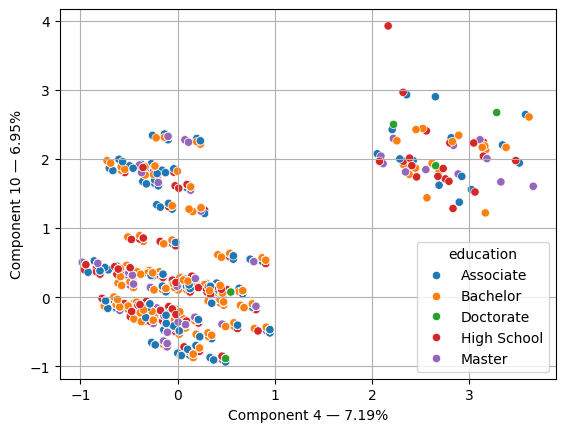

In [35]:
plot_mca(4,10,color='education')

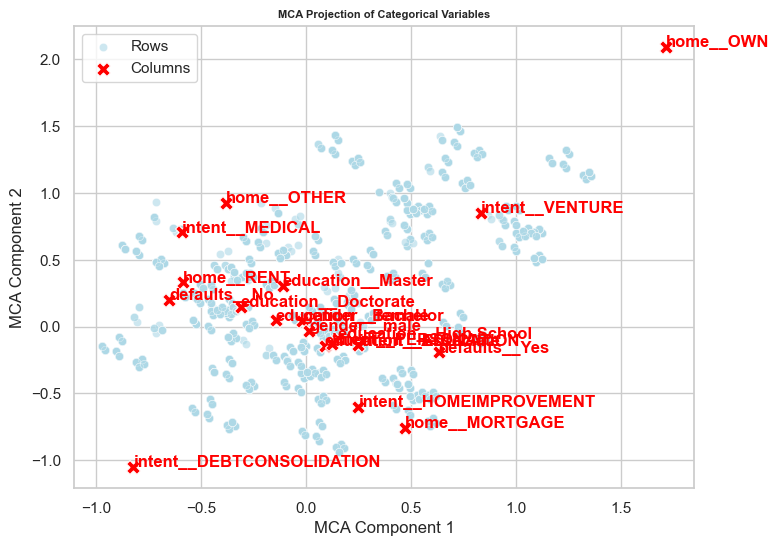

In [36]:

# Get transformed row and column coordinates
row_coords = mca.transform(df_quali_no_status)
col_coords = mca.column_coordinates(df_quali_no_status)

# Create a Seaborn scatterplot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Plot row coordinates (individuals)
sns.scatterplot(x=row_coords[0], y=row_coords[1], color="lightblue", label="Rows", alpha=0.6)

# Plot column coordinates (categories)
sns.scatterplot(x=col_coords[0], y=col_coords[1], color="red", marker="X", label="Columns", s=100)

# Annotate column coordinates (categories)
for i, col in enumerate(col_coords.index):
    plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], col, color='red', fontsize=12, fontweight='bold')

# Customize plot
plt.title("MCA Projection of Categorical Variables", fontsize=8, fontweight="bold")
plt.xlabel("MCA Component 1", fontsize=12)
plt.ylabel("MCA Component 2", fontsize=12)
plt.legend()
plt.show()


**Comment**: Visually, individuals with attributes such as intent_medical, home_rent, home_other, education_Master, and education_Doctorate—positioned in the top left—appear to have a lower likelihood of default compared to those with attributes like intent_homeimprovement, home_mortgage, etc., located in the bottom right."

### Quantitative vs Quantitative

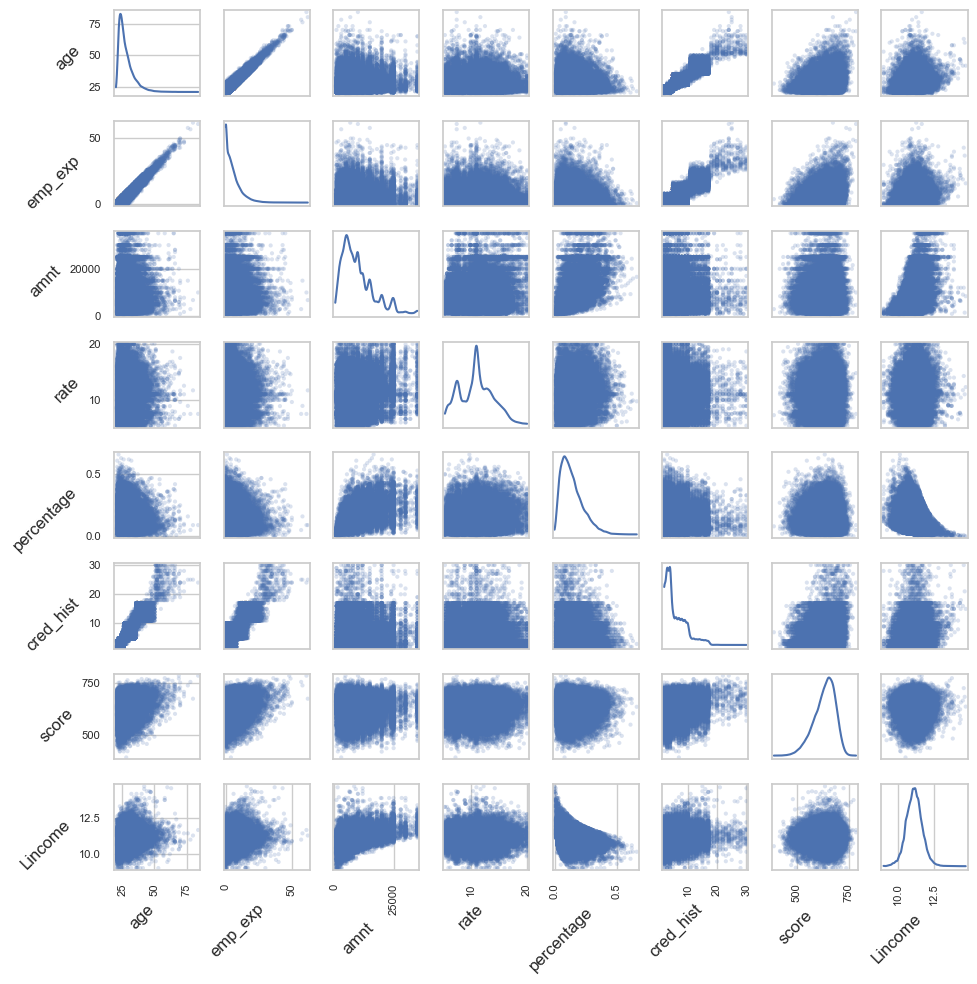

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'gym' is your DataFrame
from pandas.plotting import scatter_matrix

df_quanti = df_clean[quanti]

# Create the scatter matrix
sm = scatter_matrix(df_quanti,
              alpha=0.2,
              diagonal='kde',
              figsize=(10,10))

# Get the current figure
fig = plt.gcf()

# Loop through all axes in the figure
for ax in fig.axes:
    # Rotate the variable names on the diagonal plots
    if ax.get_title():
        ax.set_title(ax.get_title(), rotation=45, ha='right')

    # Rotate the variable names on the off-diagonal plots
    if ax.get_xlabel():
        ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
    if ax.get_ylabel():
        ax.set_ylabel(ax.get_ylabel(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

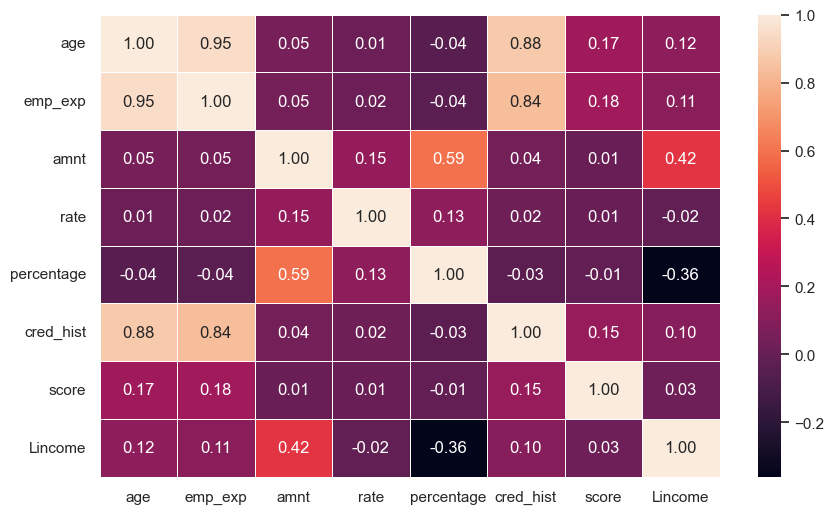

In [38]:
# Correlation matrix 

corr = df_quanti.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

**Comment**: Age, emp_exp, cred_hist are strongly correlated triplet.

#### Principal Component Analysis

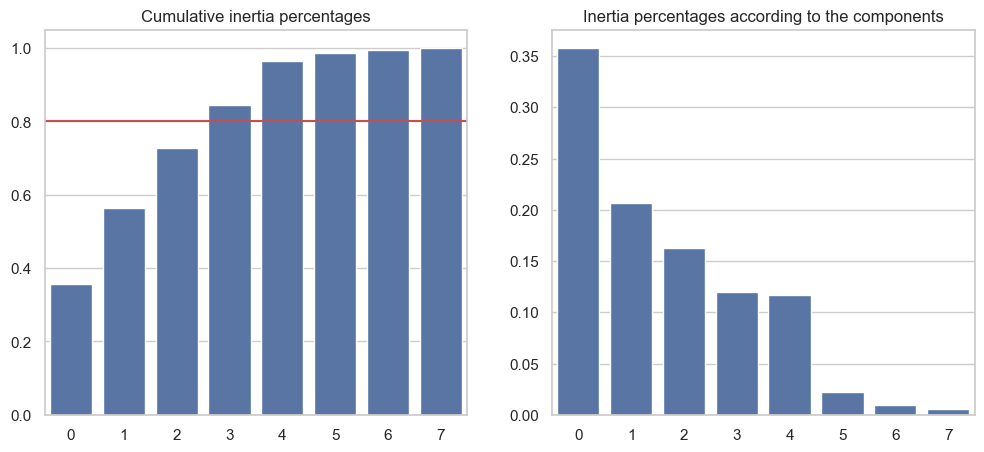

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(df_quanti)

pca = PCA()
X_pca = pca.fit(X_scaled).transform(X_scaled)

# Plot of inertia percentage according to the components
plt.subplots(1,2,figsize = (12,5))

plt.subplot(1,2,1)
sns.barplot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.8,color='r',linestyle='-')
plt.title('Cumulative inertia percentages')

plt.subplot(1,2,2)
sns.barplot(pca.explained_variance_ratio_)
plt.title('Inertia percentages according to the components')
plt.show()

**Comment**: We can retain 80% of the inertia by considering the first four components. However, the inertia percentage captured by the fifth component is comparable to that of the fourth. Therefore, keeping the fifth component can provide us with valuable additional information.

##### Representation of individuals on pca components

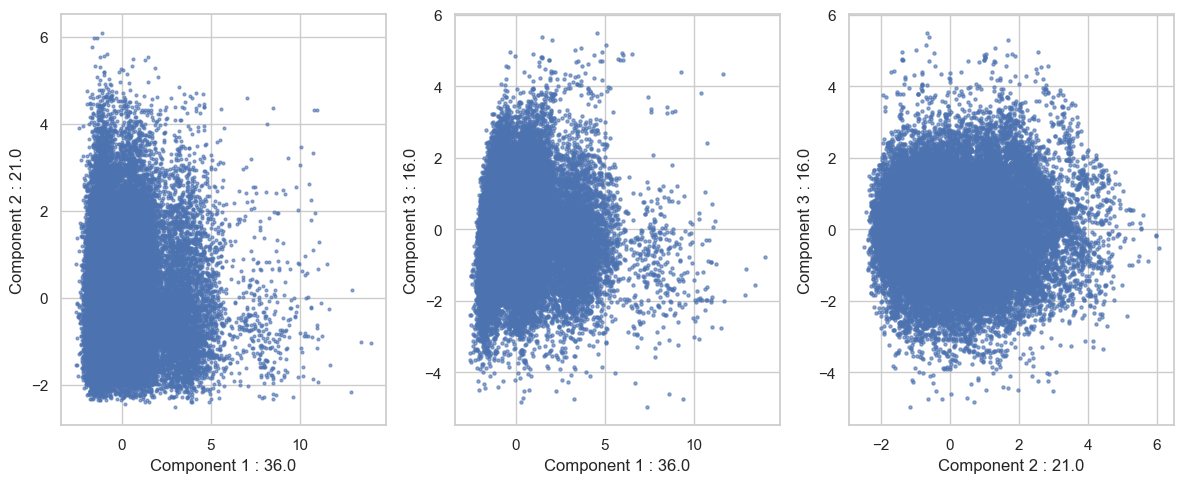

In [40]:

fig,axs = plt.subplots(1,3,figsize=(12,5))

axs[0].scatter(X_pca[:,0],X_pca[:,1],alpha=0.6, s=4)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[:,0],X_pca[:,2],alpha=0.6, s=5)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[:,1],X_pca[:,2],alpha=0.6, s=5)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

plt.tight_layout()
plt.show()

**Comment**: The presentation of indiviuals on ACP space look spherical. We do not see the evidence of subgroups.

#### Representation of individuals on pca components - cos2 coloring

In [41]:
row_sums = (X_scaled ** 2).sum(axis=1)
ind_cos2 = (X_pca ** 2)/row_sums[:,np.newaxis]
ind_cos2.shape

(44992, 8)

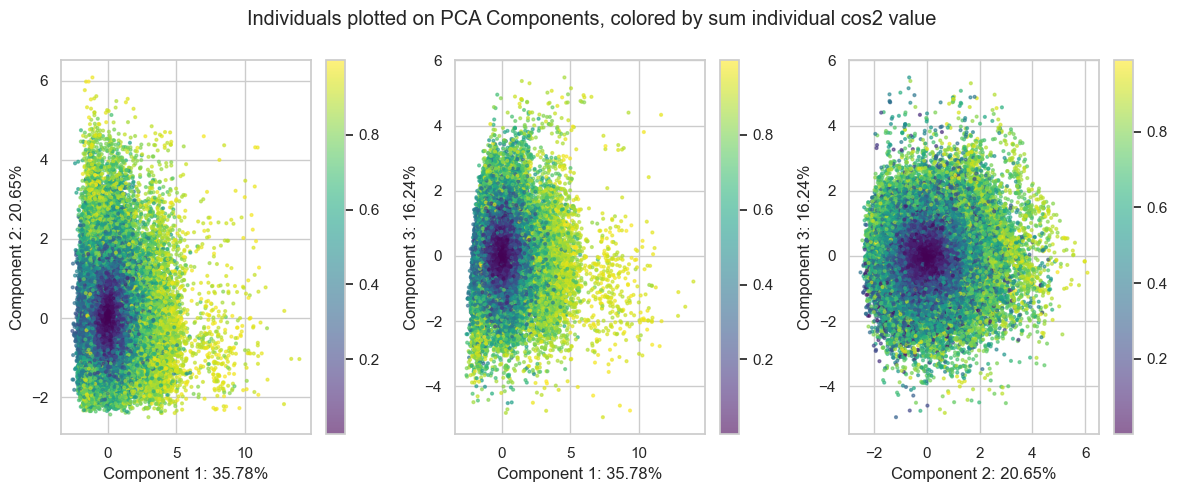

In [42]:
fig, axs = plt.subplots(1,3,figsize=(12,5))

scatter1 = axs[0].scatter(X_pca[:,0], X_pca[:,1], c = ind_cos2[:,0] + ind_cos2[:,1], cmap="viridis", alpha = 0.6, s = 4)
axs[0].set_xlabel(f"Component 1: {pca.explained_variance_ratio_[0]:.2%}")
axs[0].set_ylabel(f"Component 2: {pca.explained_variance_ratio_[1]:.2%}")

scatter2 = axs[1].scatter(X_pca[:,0], X_pca[:,2], c = ind_cos2[:,0] + ind_cos2[:,2], cmap="viridis", alpha = 0.6, s = 4)
axs[1].set_xlabel(f"Component 1: {pca.explained_variance_ratio_[0]:.2%}")
axs[1].set_ylabel(f"Component 3: {pca.explained_variance_ratio_[2]:.2%}")

scatter3 = axs[2].scatter(X_pca[:,1], X_pca[:,2], c = ind_cos2[:,1] + ind_cos2[:,2], cmap="viridis", alpha = 0.6, s = 4)
axs[2].set_xlabel(f"Component 2: {pca.explained_variance_ratio_[1]:.2%}")
axs[2].set_ylabel(f"Component 3: {pca.explained_variance_ratio_[2]:.2%}")

plt.colorbar(scatter1)
plt.colorbar(scatter2)
plt.colorbar(scatter3)

fig.suptitle("Individuals plotted on PCA Components, colored by sum individual cos2 value")
plt.tight_layout()
plt.show()

**Comment**: Points on the right edge , especially in yellow, are better represented and may be more meaningful for interpretation.

#### Representation of individuals on PCA components - coloring by qualitative class belonging

In [43]:
print(f"We will color the datapoints based on : {df_quali.columns.to_list()}")

We will color the datapoints based on : ['gender', 'education', 'home', 'intent', 'defaults', 'status']


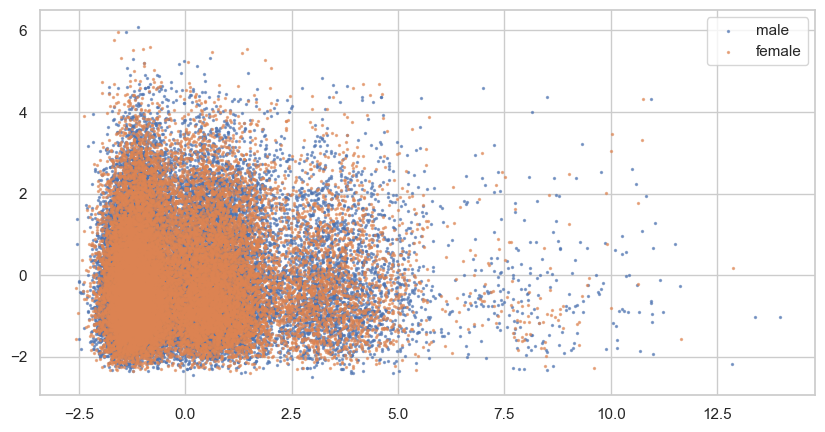

In [44]:
# color according to gender
male_idx = df_quali['gender'] =='male'
plt.figure(figsize=(10,5))
plt.scatter(X_pca[male_idx,0],X_pca[male_idx,1],label='male',alpha=0.6, s=2)
plt.scatter(X_pca[~male_idx,0],X_pca[~male_idx,1],label='female',alpha=0.6, s=2)
plt.legend()
plt.show()

In [45]:
df['defaults'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

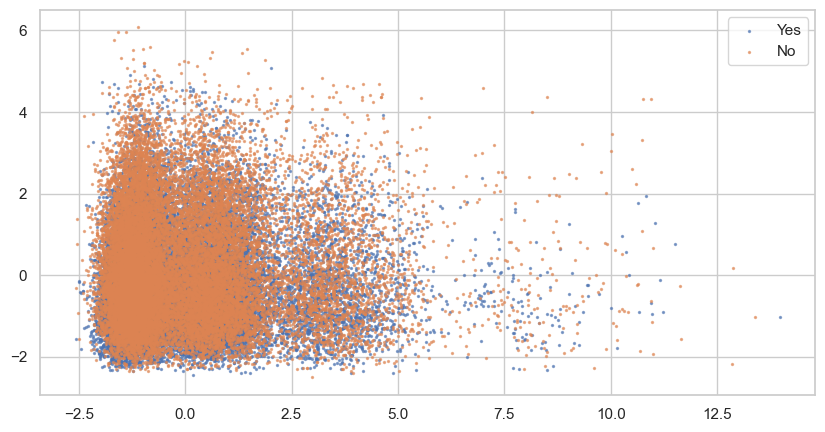

In [46]:
# color according to defaults

defaut_idx = df_quali['defaults'] =='Yes'
plt.figure(figsize=(10,5))
plt.scatter(X_pca[defaut_idx,0],X_pca[defaut_idx,1],label='Yes',alpha=0.6, s=2)
plt.scatter(X_pca[~defaut_idx,0],X_pca[~defaut_idx,1],label='No',alpha=0.6, s=2)
plt.legend()
plt.show()

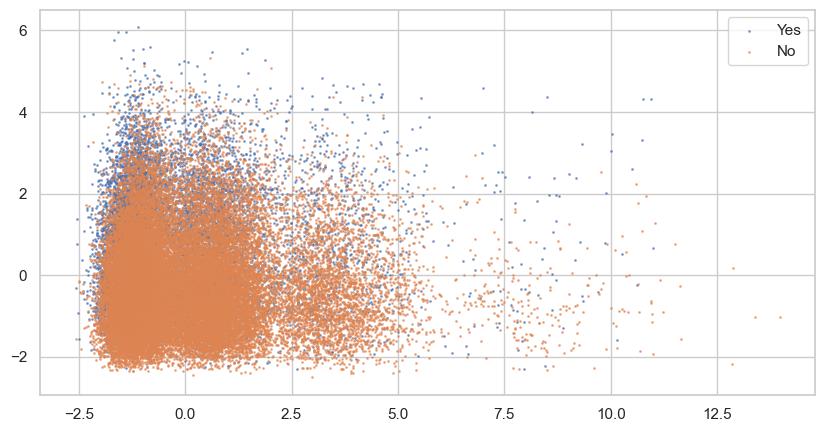

In [47]:
# color according to status

status_idx = df_quali['status'] ==1
plt.figure(figsize=(10,5))
plt.scatter(X_pca[status_idx,0],X_pca[status_idx,1],label='Yes',alpha=0.6, s=1)
plt.scatter(X_pca[~status_idx,0],X_pca[~status_idx,1],label='No',alpha=0.6, s=1)
plt.legend()
plt.show()

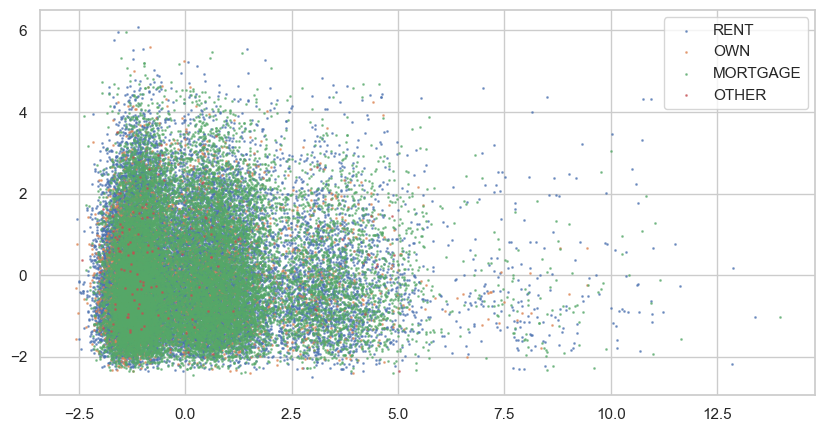

In [48]:
plt.figure(figsize=(10,5))
for home in df_quali['home'].unique():
    idx = df_quali['home']==home
    plt.scatter(X_pca[idx,0],X_pca[idx,1],label=home,alpha=0.6, s=1)
plt.legend()
plt.show()

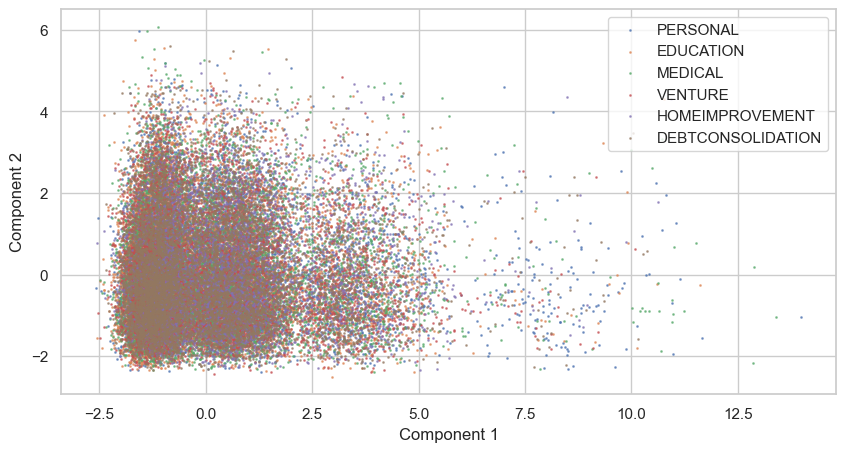

In [49]:
plt.figure(figsize=(10,5))
for intent in df_quali['intent'].unique():
    idx = df_quali['intent']==intent
    plt.scatter(X_pca[idx,0],X_pca[idx,1],label=intent,alpha=0.6, s=1)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

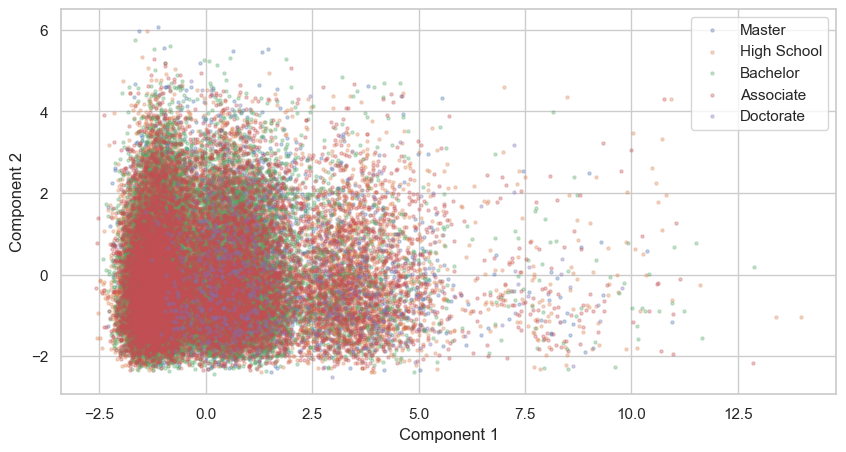

In [50]:
plt.figure(figsize=(10,5))
for edu in df_quali['education'].unique():
    idx = df_quali['education']==edu
    plt.scatter(X_pca[idx,0],X_pca[idx,1],label=edu,alpha=0.3, s=5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

**Comment**: By coloring the PCA's individuals graph by the categorical variable, we remark that there is no clear tendency or separation between the groups, indicating that the quantitative variables used in PCA do not discriminate between the modalities of the categorical variables. 

##### Representation of Variables

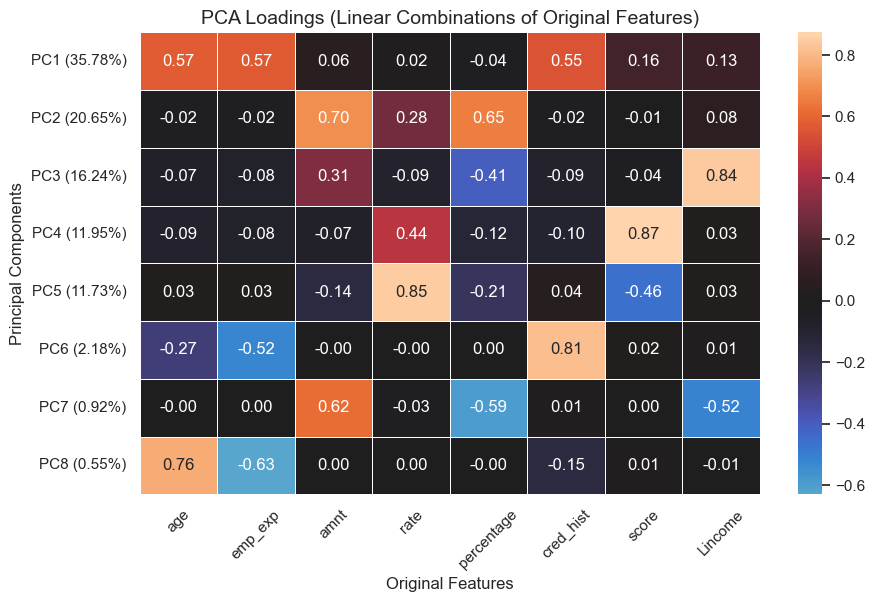

In [51]:

# plt.figure(figsize = (10,6))
# sns.heatmap(pca.components_, annot = True, fmt='.2f',linewidths=0.5)
# plt.show()

loadings = pd.DataFrame(
    pca.components_, 
    columns=quanti, 
    index=[f"PC{i+1} ({pca.explained_variance_ratio_[i]:.2%})" for i in range(pca.n_components_)]
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    loadings, 
    annot=True, 
    fmt='.2f', 
    linewidths=0.5, 
    # cmap="coolwarm",  # Diverging colormap
    center=0  # Emphasize positive & negative values
)

# Improve aesthetics
plt.title("PCA Loadings (Linear Combinations of Original Features)", fontsize=14)
plt.xlabel("Original Features", fontsize=12)
plt.ylabel("Principal Components", fontsize=12)
plt.xticks(rotation=45)  # Rotate feature names for readability
plt.yticks(rotation=0) # rotate horizontally


# Show plot
plt.show()

**Interpretation**: The above matrix shows the composition of the different features in our Principal Components (PCs). The first PC is the one that best explains the variance in our dataset, the second the second best, and so on. Our first order of business is to comment on the ratio of variance explained by the different PCs. 
### Variance explained
More than half (56%) of the dataset's quantitative variance can be explained using the first two PCs. Including the next two components, we get a satisfactory explained variance ratio of more than 80% (84%). Upon first glance, it would seem that the first two PCs give a lot of the information, while the two next PCs provide the details. 

### PC composition
1. The first PC is primarily positively correlated with *Age*, *Employment Experience*, and *Credit History*. It also has a small, positive correlation with the variables *Credit Score* and *Income*. It would seem to capture the **financial stability** of a client.
2. The second PC is primarily positively correltaed with *Loan Amount* and *Loan Percentage of Income*. It is also moderately positively correlated with *Interest Rate*. This PC seems to capture the **loan-side information**, contrary to the first PC. It should not come as a surprise that these two PCs capture a large amount of the information.
3. The third PC is primarily positively correlated with the *Income* variable*, as well as the *Loan Amount* (positively) and *Loan Percentage of Income* (negatively), but in a more moderate way. It would seem like this PC captures the relationship between the client's income and the loan. This further strengthens the idea of two primary and two complementary PCs.
4. The fourth PC is primarily postively correlated with the *Credit Score* variable, as well as moderately positively correlated with the *Interest Rate*. Both of these variables have no major correlation with any of the other variables (ref. correlation matrix), so it would seem this PC captures some of the information left out by the previous PCs, although a precise interpretation is though to come by.
5. The fifth PC is primarily positively correlated with *Interest Rate*,  and negatively correlated with the *Credit Score*. It would seem this PC indicate the group of people that have poor credit, so the banque give them loans but charge much more in interest because they're seen as more likely to miss payments.

<bound method Axes.set of <Axes: >>

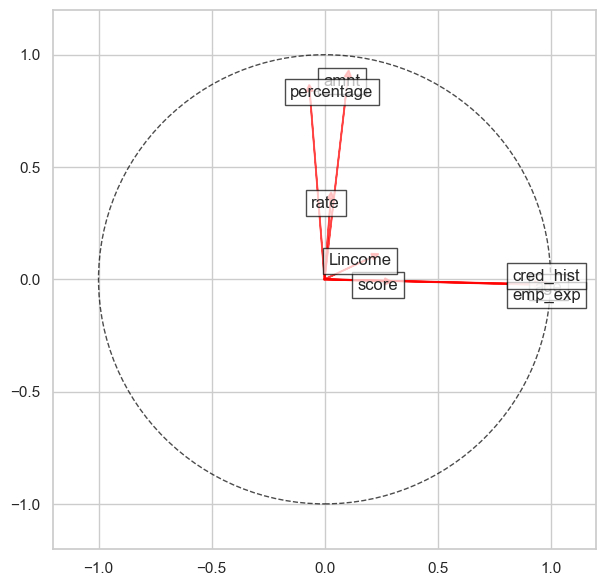

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Compute coordinates for the PCA vectors
coord0 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord1 = pca.components_[1]* np.sqrt(pca.explained_variance_[1])

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Store text objects for adjustment
texts = []

# Plot vectors with labels
for i, j, nom in zip(coord0, coord1, quanti):
    plt.arrow(0, 0, i, j, color='red', alpha=0.7, head_width=0.03, head_length=0.03, linewidth=1.2)
    text = plt.text(i, j, nom, fontsize=12, ha='center', va='center', 
                    bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))
    texts.append(text)

# Adjust text positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Add unit circle
circle = plt.Circle((0, 0), radius=1.0, color='black', fill=False, linestyle='dashed', alpha=0.7)
ax.add_patch(circle)

# Set axis limits and labels
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set


**Comment**: The variable presentation on pca plane confirms our previous observation that cred_hist, emp_exp, and age are strongly correlated; moreover, we also remark that these 3 variables seem to be independent from amnt, percentage, and rate.

### Quantitative vs Categorical

#### Boxplots

Boxplot of all quantitative variables according to gender


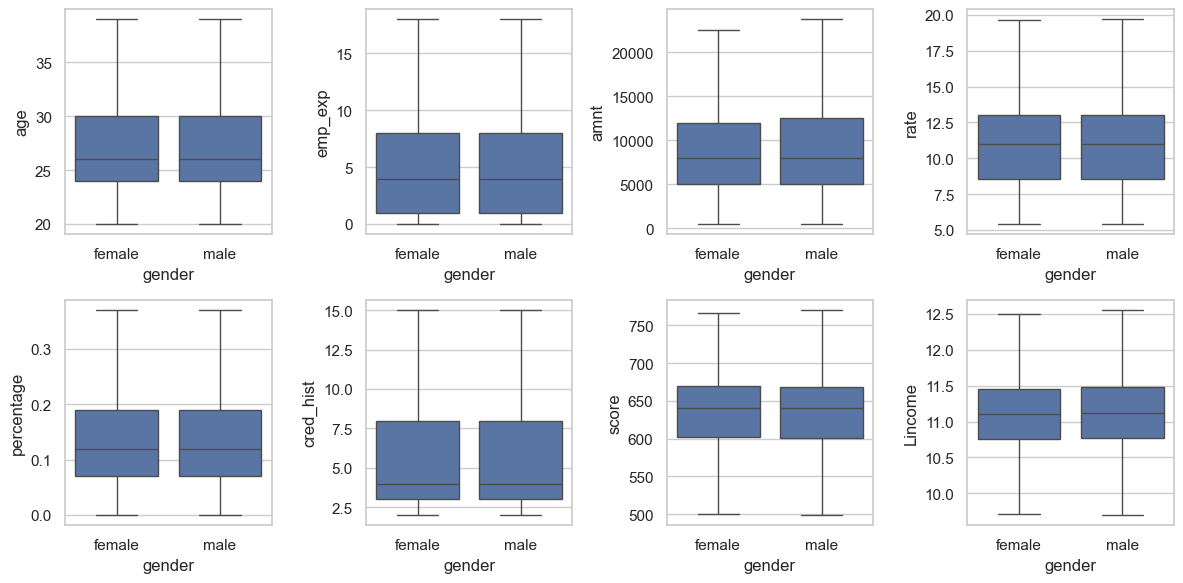

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to education


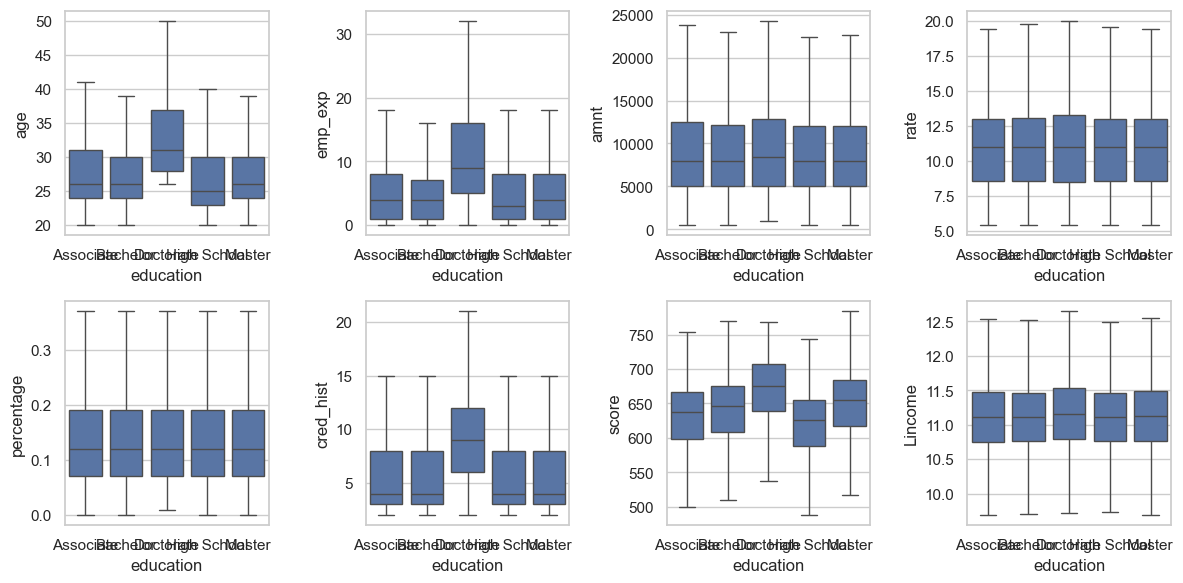

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to home


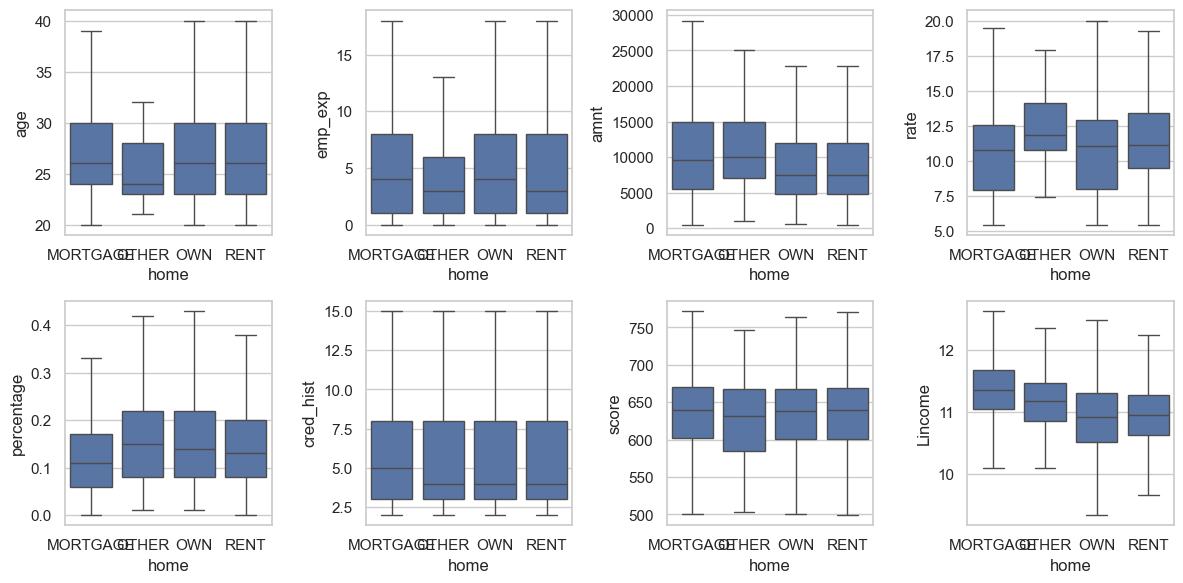

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to intent


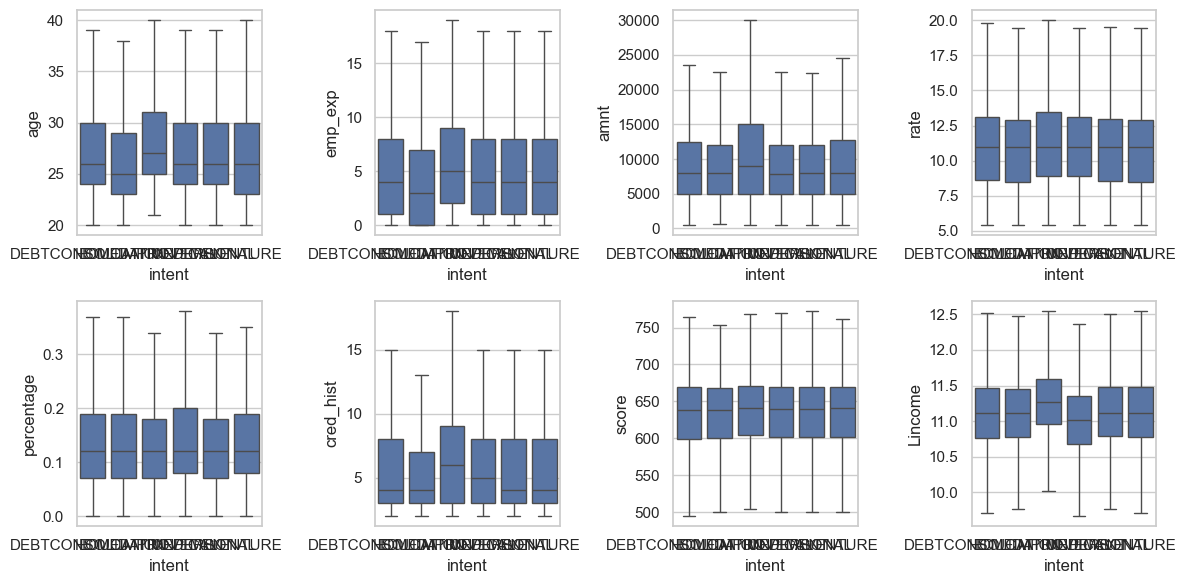

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to defaults


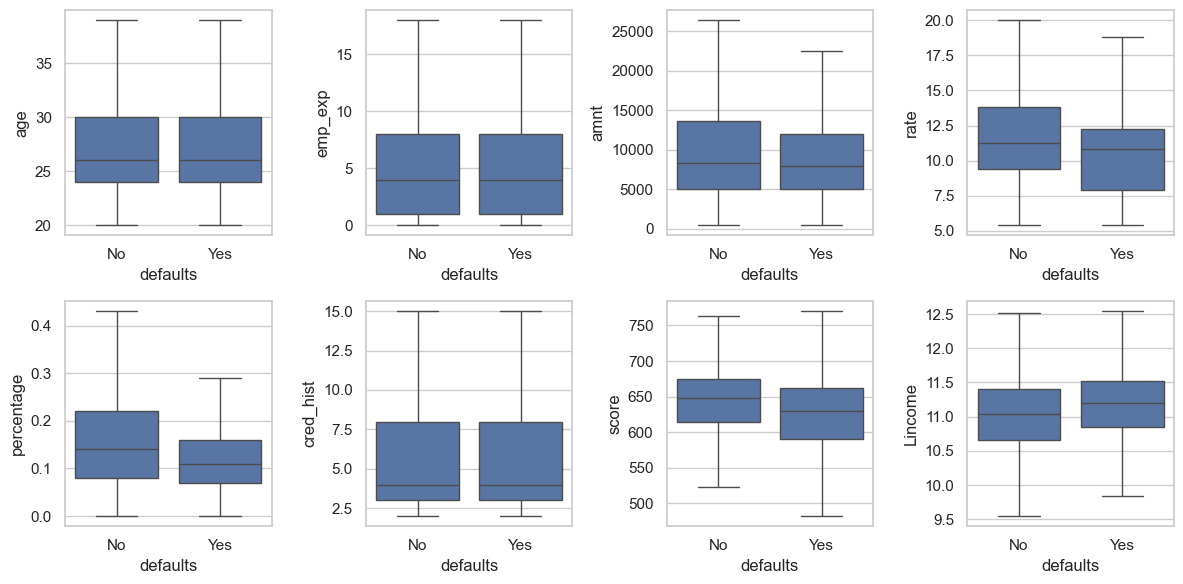

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to status


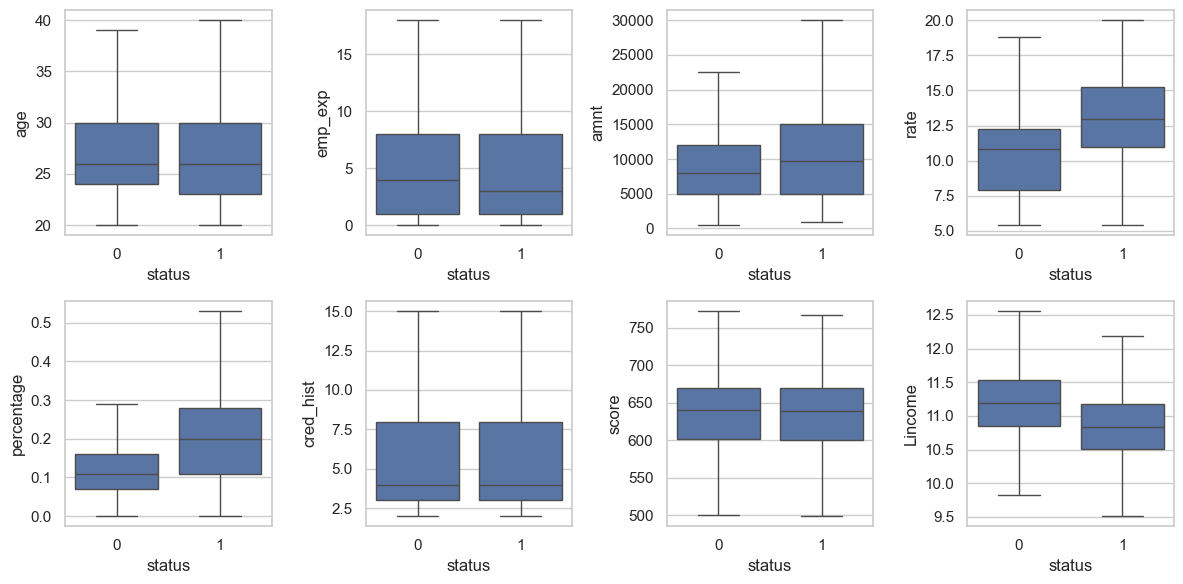

-----------------------------------------------------------------------------------


In [53]:

for i in range(len(quali)):
    print(f"Boxplot of all quantitative variables according to {quali[i]}")
    fig, axes = plt.subplots(2,4,figsize=(12,6))
    axes = np.ravel(axes)
    for j in range(len(quanti)):
        sns.boxplot(x=quali[i],y=quanti[j],data=df_clean,showfliers=False,ax=axes[j])
#         axes[j].set_title(f"{quanti[j]} vs {quali[i]}")
        # axes[j].axis('off')
    plt.tight_layout()
    plt.show()
    print ("-----------------------------------------------------------------------------------")

**Comment**: I propose to perform MFA

#### MFA

In [54]:
df_clean.drop(columns="status")

age  gender    education  emp_exp      home     amnt  \
0      22.0  female       Master        0      RENT  35000.0   
1      21.0  female  High School        0       OWN   1000.0   
2      25.0  female  High School        3  MORTGAGE   5500.0   
3      23.0  female     Bachelor        0      RENT  35000.0   
4      24.0    male       Master        1      RENT  35000.0   
...     ...     ...          ...      ...       ...      ...   
44995  27.0    male    Associate        6      RENT  15000.0   
44996  37.0  female    Associate       17      RENT   9000.0   
44997  33.0    male    Associate        7      RENT   2771.0   
44998  29.0    male     Bachelor        4      RENT  12000.0   
44999  24.0    male  High School        1      RENT   6665.0   

                  intent   rate  percentage  cred_hist  score defaults  \
0               PERSONAL  16.02        0.49        3.0    561       No   
1              EDUCATION  11.14        0.08        2.0    504      Yes   
2                MEDICAL  12.87        0.44        3.0    635       No   
3                MEDICAL  15.23        0.44        2.0    675       No   
4                MEDICAL  14.27        0.53        4.0    586       No   
...                  ...    ...         ...        ...    ...      ...   
44995            MEDICAL  15.66        0.31        3.0    645       No   
44996    HOMEIMPROVEMENT  14.07        0.14       11.0    621       No   
44997  DEBTCONSOLIDATION  10.02        0.05       10.0    668       No   
44998          EDUCATION  13.23        0.36        6.0    604       No   
44999  DEBTCONSOLIDATION  17.05        0.13        3.0    628       No   

         Lincome  
0      11.183699  
1       9.415890  
2       9.428512  
3      11.286690  
4      11.099453  
...          ...  
44995  10.778352  
44996  11.094375  
44997  10.949788  
44998  10.409220  
44999  10.851451  

[44992 rows x 13 columns]

In [55]:
from itertools import product
groups = {"Personals": ["age", "gender", "education", "emp_exp"],
          "Financials": ["amnt", "rate", "Lincome", "percentage"],
          "Credit": ["cred_hist", "score", "defaults"],
          "Details": ["home", "intent"]
         }
df_mfa = pd.DataFrame()
for k in groups.keys():
    for i in groups[k]:
        df_mfa[(k,i)] = df_clean[i]

df_mfa.columns = pd.MultiIndex.from_tuples(df_mfa.columns.to_list())
print(df_mfa)
print("-----------")
print(df_mfa.dtypes)

      Personals                              Financials                    \
            age  gender    education emp_exp       amnt   rate    Lincome   
0          22.0  female       Master       0    35000.0  16.02  11.183699   
1          21.0  female  High School       0     1000.0  11.14   9.415890   
2          25.0  female  High School       3     5500.0  12.87   9.428512   
3          23.0  female     Bachelor       0    35000.0  15.23  11.286690   
4          24.0    male       Master       1    35000.0  14.27  11.099453   
...         ...     ...          ...     ...        ...    ...        ...   
44995      27.0    male    Associate       6    15000.0  15.66  10.778352   
44996      37.0  female    Associate      17     9000.0  14.07  11.094375   
44997      33.0    male    Associate       7     2771.0  10.02  10.949788   
44998      29.0    male     Bachelor       4    12000.0  13.23  10.409220   
44999      24.0    male  High School       1     6665.0  17.05  10.851451   

We need to change the following variables' types to ensure intragroup homogenousity:
- Personals, age: float -> category
- Personals, emp_exp: float -> category
- Credit, cred_hist: float -> category
- Credit, score: int -> category

----
          Personals              
                age       emp_exp
count  44992.000000  44992.000000
mean      27.746955      5.392959
std        5.901543      5.917871
min       20.000000      0.000000
25%       24.000000      1.000000
50%       26.000000      4.000000
75%       30.000000      8.000000
max       84.000000     62.000000


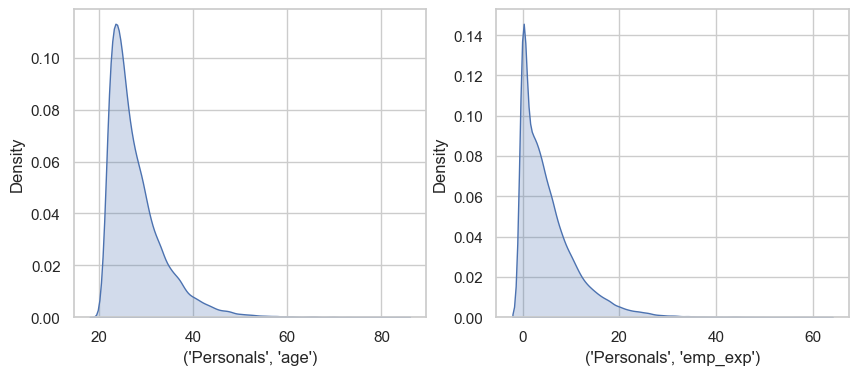

In [56]:
fig, Axes = plt.subplots(1,2,figsize=(10,4))
sns.kdeplot(df_mfa[("Personals","age")].astype(float), fill=True, ax=Axes[0])
sns.kdeplot(df_mfa[("Personals","emp_exp")].astype(float), fill=True, ax=Axes[1])
print("----")
print(df_mfa[[("Personals","age"),("Personals","emp_exp")]].describe())

<Axes: xlabel='(Personals, emp_exp)'>

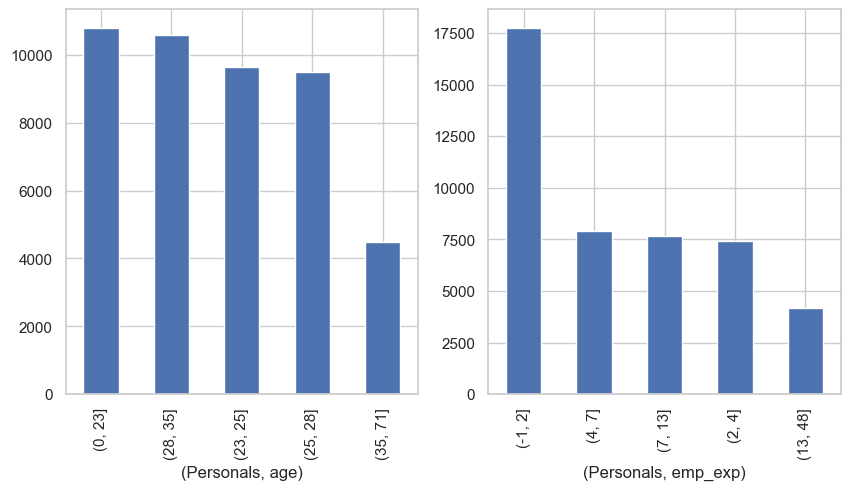

In [57]:
fig, Ax = plt.subplots(1,2,figsize=(10,5))

age_bins = pd.cut(df_mfa[("Personals","age")], bins=[0, 23, 25, 28, 35, 71])
age_bins.value_counts().plot(kind="bar", ax=Ax[0])
empexp_bins = pd.cut(df_mfa[("Personals","emp_exp")], bins=[-1, 2, 4, 7, 13, 48])
empexp_bins.value_counts().plot(kind="bar", ax=Ax[1])

In [58]:
#we perform the transformation
# binned = binned.astype(str).replace({
#     '(0.0, 1.0]': 'Small',
#     '(2.0, 3.0]': 'Medium',
#     '(4.0, 5.0]': 'Large'
# }).astype('category')

age_bins = age_bins.astype('str').replace({
    '(0, 23]':  'very young',
    '(23, 25]': 'young',
    '(25, 28]': 'adult',
    '(28, 35]': 'middle-aged',
    '(35, 71]': 'old'
}).astype('category')

empexp_bins = empexp_bins.astype('str').replace({
    '(-1, 2]':  'very small',
    '(2, 4]':   'small',
    '(4, 7]':   'quite small',
    '(7, 13]':  'medium',
    '(13, 48]': 'long'
}).astype('category')

df_mfa[("Personals","age")] = age_bins.astype("category")
df_mfa[("Personals","emp_exp")] = empexp_bins.astype("category")
print("----")
print(df_mfa.dtypes)

----
Personals   age           category
            gender        category
            education     category
            emp_exp       category
Financials  amnt           float64
            rate           float64
            Lincome        float64
            percentage     float64
Credit      cred_hist      float64
            score            int64
            defaults      category
Details     home          category
            intent        category
dtype: object


(2,)
----
             Credit              
          cred_hist         score
count  44992.000000  44992.000000
mean       5.866087    632.582592
std        3.875930     50.398623
min        2.000000    390.000000
25%        3.000000    601.000000
50%        4.000000    640.000000
75%        8.000000    670.000000
max       30.000000    784.000000


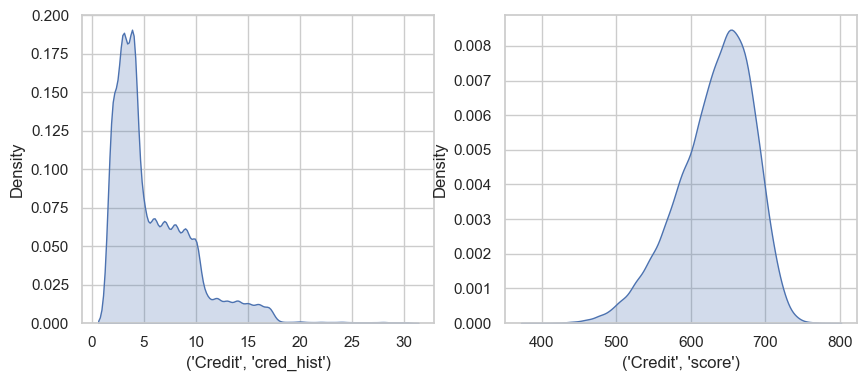

In [59]:
fig, Axes = plt.subplots(1,2,figsize=(10,4))
print(Axes.shape)
sns.kdeplot(df_mfa[("Credit","cred_hist")], fill=True, ax=Axes[0])
sns.kdeplot(df_mfa[("Credit","score")].astype(float), fill=True, ax=Axes[1])
print("----")
print(df_mfa[[("Credit","cred_hist"),("Credit","score")]].describe())

<Axes: xlabel='(Credit, score)'>

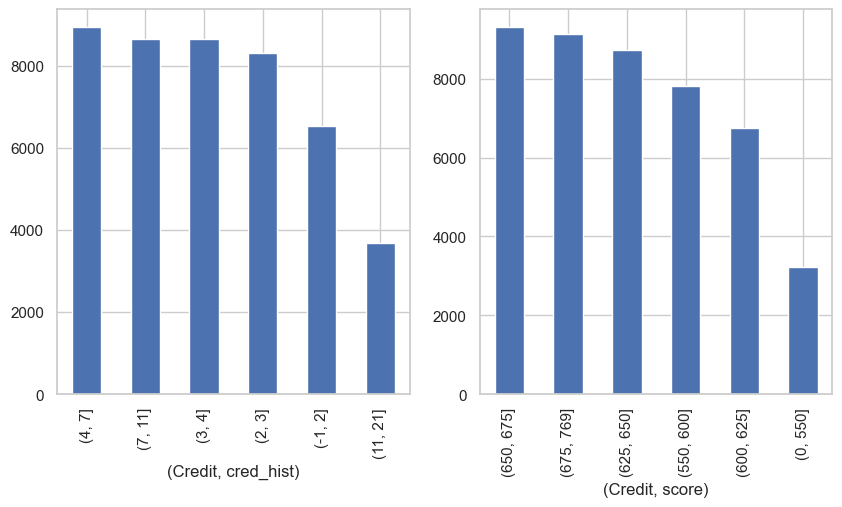

In [60]:
fig, Ax = plt.subplots(1,2,figsize=(10,5))

hist_bins = pd.cut(df_mfa[("Credit","cred_hist")], bins=[-1, 2, 3, 4, 7, 11, 21])
hist_bins.value_counts().plot(kind="bar", ax=Ax[0])
score_bins = pd.cut(df_mfa[("Credit","score")], bins=[0, 550, 600, 625, 650, 675, 769])
score_bins.value_counts().plot(kind="bar", ax=Ax[1])

In [61]:
#we perform the transformation
hist_bins = hist_bins.astype('str').replace({
    '(-1, 2]': 'very short',
    '(2, 3]': 'short',
    '(3, 4]': 'quite short',
    '(4, 7]': 'medium',
    '(7, 11]': 'long',
    '(11, 21]': 'very long'
})

score_bins = score_bins.astype('str').replace({
    '(0, 550]':   'very low',
    '(550, 600]': 'low',
    '(600, 625]': 'quite low',
    '(625, 650]': 'medium',
    '(650, 675]': 'high',
    '(675, 769]': 'insane'
})
    

df_mfa[("Credit","score")] = score_bins.astype("category")
df_mfa[("Credit","cred_hist")] = hist_bins.astype("category")
print("----")
print(df_mfa.dtypes)

----
Personals   age           category
            gender        category
            education     category
            emp_exp       category
Financials  amnt           float64
            rate           float64
            Lincome        float64
            percentage     float64
Credit      cred_hist     category
            score         category
            defaults      category
Details     home          category
            intent        category
dtype: object


In [62]:
nacounts = df_mfa.isna().sum()
nacounts.name = "nacounts"
dtypes = df_mfa.dtypes
dtypes.name = "dtypes"

print(pd.merge(dtypes, nacounts, left_index=True, right_index=True))

                         dtypes  nacounts
Personals  age         category         0
           gender      category         0
           education   category         0
           emp_exp     category         0
Financials amnt         float64         0
           rate         float64         0
           Lincome      float64         0
           percentage   float64         0
Credit     cred_hist   category         0
           score       category         0
           defaults    category         0
Details    home        category         0
           intent      category         0


In [63]:
df_mfa[("Credit", "cred_hist")] = df_mfa[("Credit", "cred_hist")].cat.as_unordered()
df_mfa[("Credit", "score")] = df_mfa[("Credit", "score")].cat.as_unordered()
df_mfa[("Credit", "defaults")] = df_mfa[("Credit", "defaults")].cat.as_unordered()
credit_columns = ['cred_hist', 'score', 'defaults']

for col in credit_columns:
    col_data = df_mfa[("Credit", col)]
    print(f"Column {col}: Ordered={col_data.cat.ordered}")

Column cred_hist: Ordered=False
Column score: Ordered=False
Column defaults: Ordered=False


In [64]:
print(df_mfa["Credit"].dtypes)

cred_hist    category
score        category
defaults     category
dtype: object


In [65]:
print("all numeric")
for x in df_mfa.columns.to_list():
    print(f"{x} : {pd.api.types.is_numeric_dtype(df_mfa[x])}")

print("----------")
print("all string")
for x in df_mfa.columns.to_list():
    print(f"{x} : {pd.api.types.is_string_dtype(df_mfa[x])}")

all numeric
('Personals', 'age') : False
('Personals', 'gender') : False
('Personals', 'education') : False
('Personals', 'emp_exp') : False
('Financials', 'amnt') : True
('Financials', 'rate') : True
('Financials', 'Lincome') : True
('Financials', 'percentage') : True
('Credit', 'cred_hist') : False
('Credit', 'score') : False
('Credit', 'defaults') : False
('Details', 'home') : False
('Details', 'intent') : False
----------
all string
('Personals', 'age') : True
('Personals', 'gender') : True
('Personals', 'education') : True
('Personals', 'emp_exp') : True
('Financials', 'amnt') : False
('Financials', 'rate') : False
('Financials', 'Lincome') : False
('Financials', 'percentage') : False
('Credit', 'cred_hist') : True
('Credit', 'score') : True
('Credit', 'defaults') : True
('Details', 'home') : True
('Details', 'intent') : True


In [66]:
import prince
print(prince.__version__)

# df_mfa = df_mfa.reindex(columns=df_mfa.columns)
# mfa = prince.MFA(n_components=2)
# X_mfa = mfa.fit_transform(df_mfa)

# print("----")
# print(X_mfa)

0.16.0


In [67]:
from prince import FAMD

df_flat = df_mfa.copy()
df_flat.columns = ['_'.join(col) for col in df_flat.columns]

famd = FAMD()
X_famd = famd.fit_transform(df_flat)

In [68]:
print(X_famd)

component         0         1
0         -3.181804  2.195112
1         -3.910634  3.569092
2         -2.417129  1.464155
3         -3.094545  2.025595
4         -2.964452  1.848036
...             ...       ...
44995     -0.869918 -1.188114
44996      7.019840  2.640413
44997      1.711857 -4.374182
44998     -0.098516 -3.134852
44999     -2.932580  2.458629

[44992 rows x 2 columns]


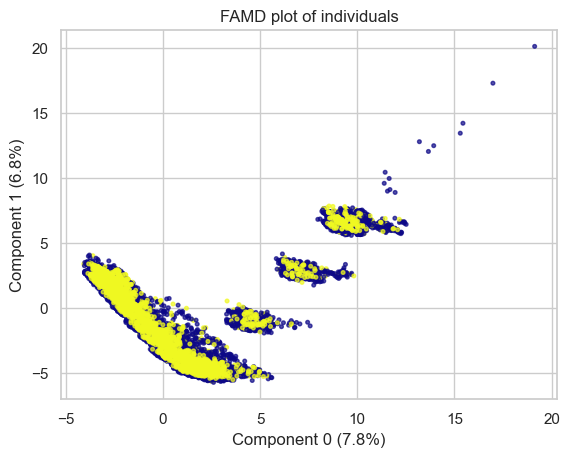

In [69]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_famd[0], X_famd[1], cmap="plasma", alpha=0.7, s=7, c=df_clean["status"])#df_flat["Credit_defaults"].replace({"Yes": 1, "No": 0})
ax.set_title("FAMD plot of individuals")
ax.set_xlabel("Component 0 ({:.1f}%)".format(famd.percentage_of_variance_[0]))
ax.set_ylabel("Component 1 ({:.1f}%)".format(famd.percentage_of_variance_[1]))
plt.show()

In [70]:
famd.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0             12.933         7.79%                      7.79%
1             11.365         6.85%                     14.64%

In [71]:
famd.column_contributions_

component                     0             1
variable                                     
Financials_amnt        0.000277  1.942902e-04
Financials_rate        0.000041  5.999624e-08
Financials_Lincome     0.001329  7.737300e-04
Financials_percentage  0.000131  5.424284e-05
Credit_cred_hist       0.069255  7.139686e-02
Credit_defaults        0.000233  3.403622e-09
Credit_score           0.005791  5.970322e-04
Details_home           0.000342  5.512777e-04
Details_intent         0.001776  1.293364e-03
Personals_age          0.072429  7.762602e-02
Personals_education    0.003245  4.139030e-03
Personals_emp_exp      0.068806  6.662757e-02
Personals_gender       0.000025  7.982261e-05

# Clustering 

## KMEAN

### Kmean with fixed number of classes

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import colors

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

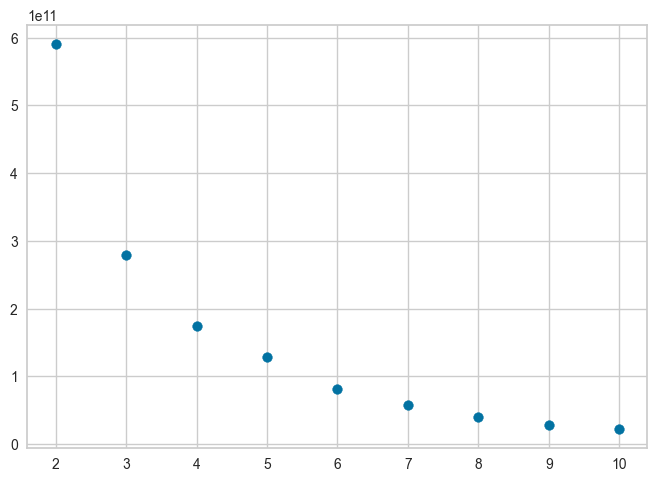

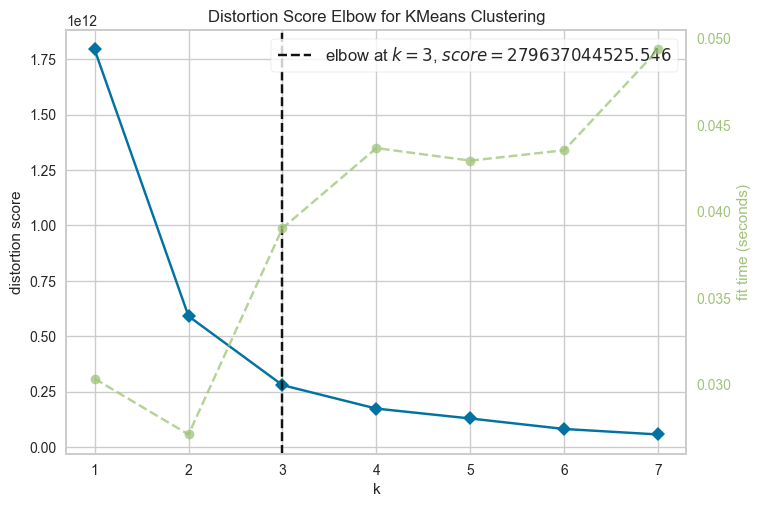

<Figure size 800x550 with 0 Axes>

In [73]:
# By hand

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans.fit(df_quanti)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.scatter(range(2, 11), inertia[1:])
plt.show()


# --- #


# Using yellowbrick

kmeans = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,8))

visualizer.fit(df_quanti)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

plt.savefig("yellowbrick_kmeans.jpg") #<--- maybe add this

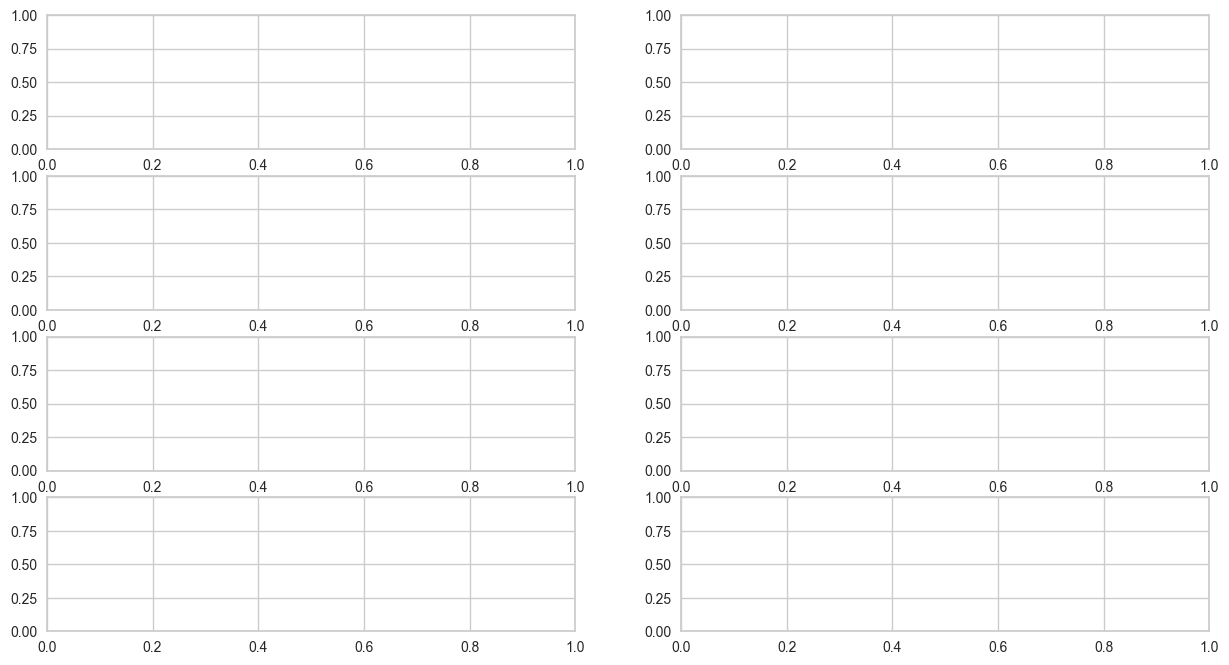

In [74]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))
run = False # replace by True if you want to plot the silhouette score, but long time needed
if run:
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
        q, mod = divmod(k, 2)
        
        # Create SilhouetteVisualizer instance with KMeans instance
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(df_quanti)

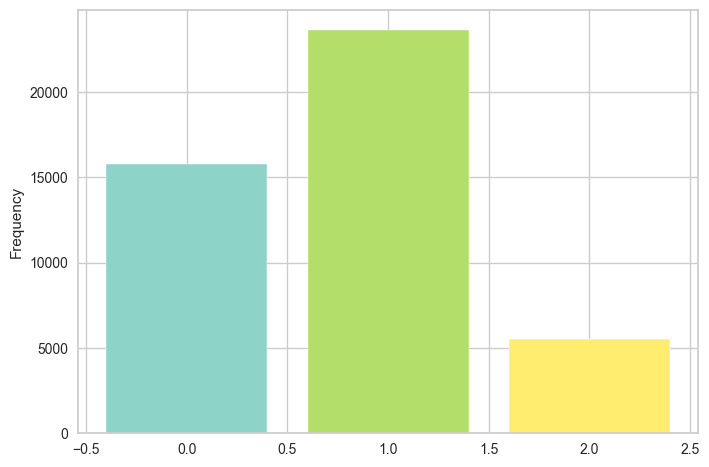

In [75]:

K = 3

kmeans = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters = kmeans.fit_predict(df_quanti)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

### PCA visualisation of the K-means

In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(df_quanti)

pca = PCA()
X_pca = pca.fit(X_scaled).transform(X_scaled)

In [77]:
def plot_pca(axe1, axe2, title,y,pca=pca, X_pca=X_pca, cmap=cmap, figsize=(9,6)):
    axe1, axe2 = axe1-1, axe2-1
    fig,ax = plt.subplots(1,1,figsize=figsize)
    # ax.scatter(X_pca[:,axe1], X_pca[:,axe2], c=y, cmap=cmap, s=5)
    ax.set_xlabel(f"PCA component {axe1+1:d} ({pca.explained_variance_ratio_[axe1]:.2%})")
    ax.set_ylabel(f"PCA component {axe2+1:d} ({pca.explained_variance_ratio_[axe2]:.2%})")
    unique_classes = np.unique(y)
    
    for i, clss in enumerate(unique_classes):
        mask = y==clss
        ax.scatter(X_pca[mask, axe1], X_pca[mask, axe2], color = cmap.colors[i], label=f"Cluster {i}", s=5)
    ax.set_title(title)
    ax.legend(markerscale=3)
    return fig,ax

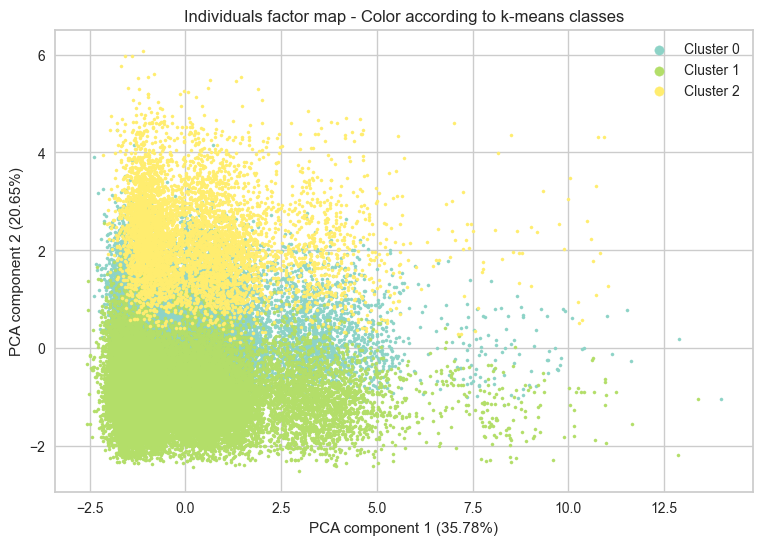

In [78]:
plot_pca(1, 2, "Individuals factor map - Color according to k-means classes", y= clusters)
plt.show()

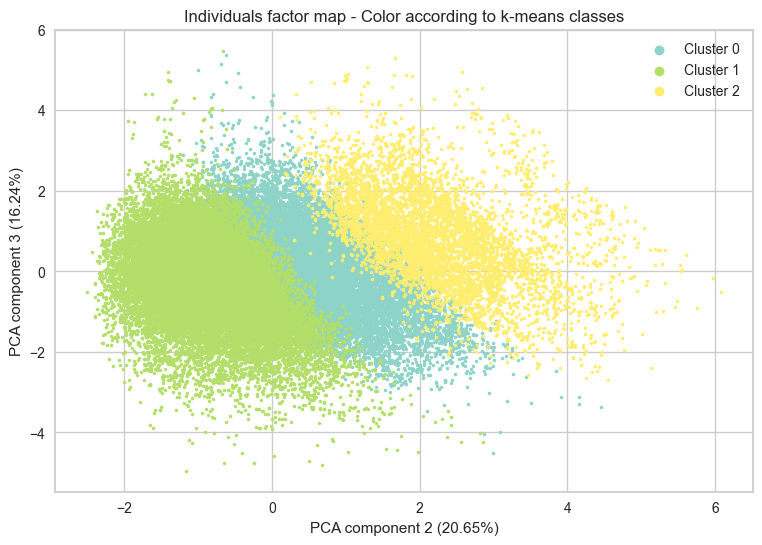

In [79]:
plot_pca(2,3, "Individuals factor map - Color according to k-means classes", y= clusters)
plt.show()

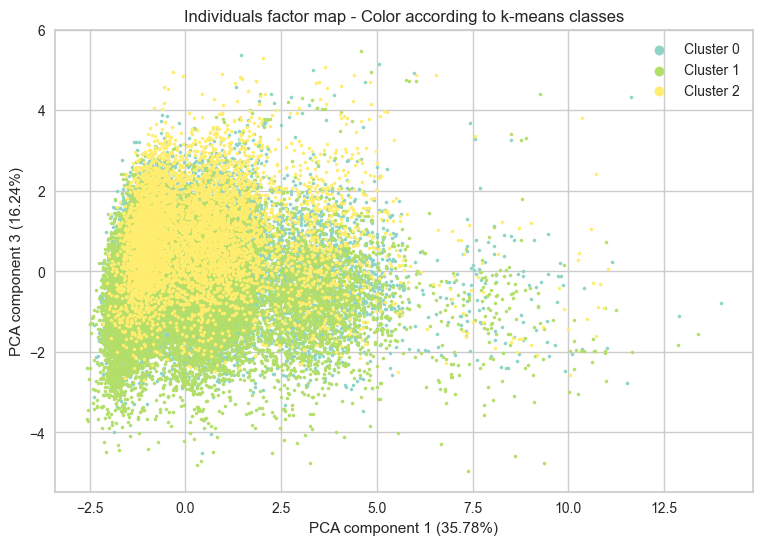

In [80]:
plot_pca(1,3,"Individuals factor map - Color according to k-means classes", y= clusters)
plt.show()

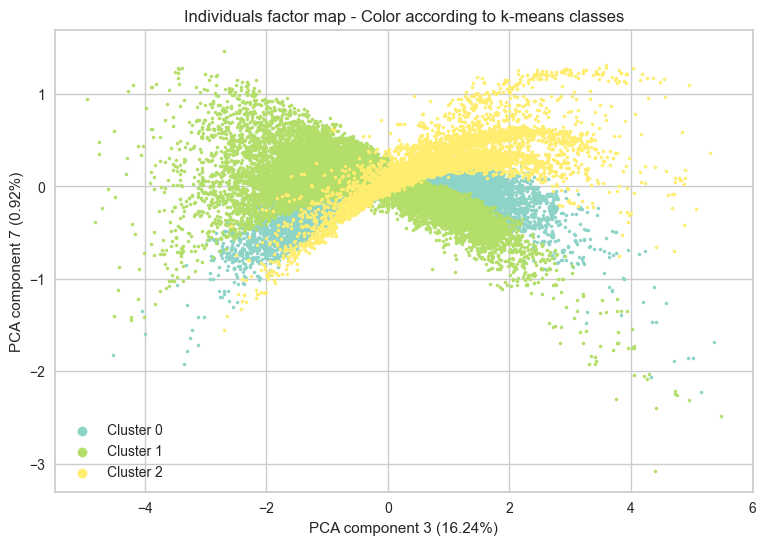

In [81]:
plot_pca(3,7, "Individuals factor map - Color according to k-means classes", y= clusters)
plt.show()

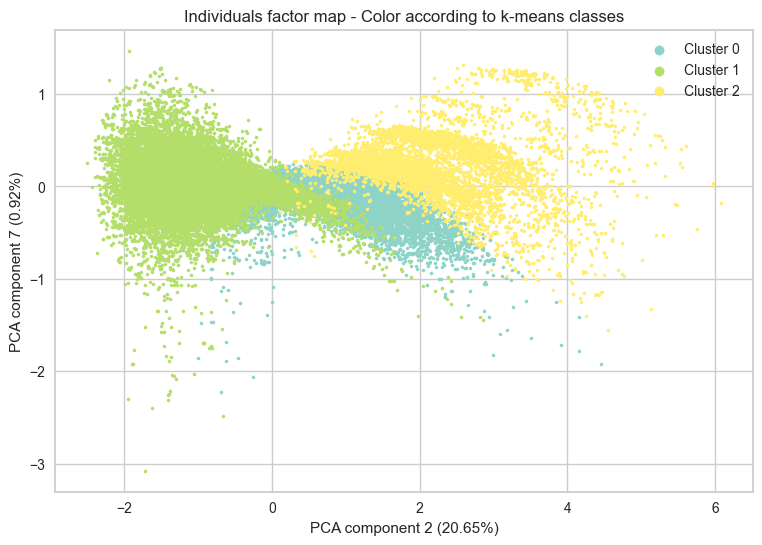

In [82]:
plot_pca(2,7, "Individuals factor map - Color according to k-means classes", y= clusters)
plt.show()

**Comment:** We get the best separation of class in the PCA space for the principal components 2, 3, and 7, capturing respectively $20.72$, $16.27$, and $0.88$ % of the explained variance. We will look into the composition of these variables to better understand the clusters created by K-means.

Comparing the graphs obtained from plotting along the different principal components, we see that the best separation occurs when plotting along the 2nd and 3rd. We name $\mathcal{X}$ the space created by these two principal components.
The observed cluster frontiers are all situated ortogonally to the diagonal of $\mathcal{X}$. Moving diagonally in $\mathcal{X}$, we are able to switch clusters. Exiting a cluster, we are almost sure to a certain noise induced probability of never returning, when moving along the diagonal axis. This would indicate that there exists a linear function in $\mathcal{X}$ that explains the clusters.

Similarily, naming $\mathcal{Z}$ the space created by the 3rd and 7th principal components, there seems to exist a second degree polynomial that wholly describes each cluster, with varying width and argmax. However, noting the more straight forward separation observed in $\mathcal{X}$, we keep our analysis focused on this space only.

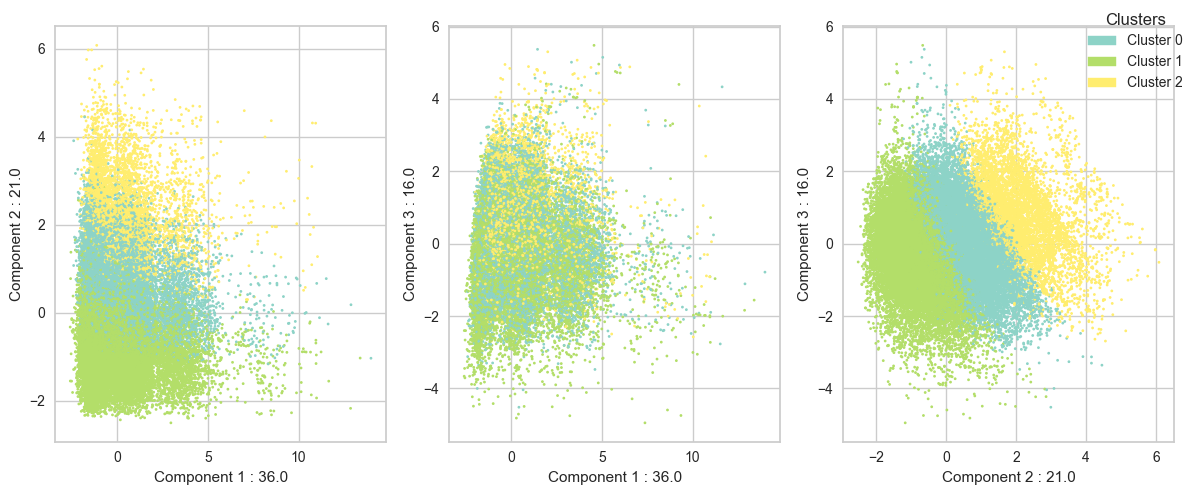

In [83]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm

cmap = plt.get_cmap("Set3", K)  # Choose a colormap with K clusters
colors = [cmap(i/K) for i in range(K)]  # Generate distinct colors

fig,axs = plt.subplots(1,3,figsize=(12,5))

sc=axs[0].scatter(X_pca[:,0],X_pca[:,1],c= clusters, s=1, linewidths=1, cmap=cmap)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[:,0],X_pca[:,2],c=clusters, s=1, linewidths=1, cmap=cmap)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[:,1],X_pca[:,2],c=clusters, s=1, linewidths=1, cmap=cmap)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")


# patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(K)]
patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(K)]
fig.legend(handles=patches, title="Clusters", loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.show()

In [84]:
df_pca_comp = pd.DataFrame(pca.components_.T, columns=np.arange(1, pca.components_.shape[1]+1), index=df_quanti.columns)
print("".join([f"PCA {i+1}: {v:.2%}, " for i,v in enumerate(pca.explained_variance_ratio_)]))
print("----")
pd.set_option('display.width', 1000)
# styled_df = df.style.set_properties(subset=['col1', 'col2'], **{'background-color': 'yellow'})
df_pca_comp.style.set_properties(subset=[2,3,7], **{"background-color": "yellow"})

PCA 1: 35.78%, PCA 2: 20.65%, PCA 3: 16.24%, PCA 4: 11.95%, PCA 5: 11.73%, PCA 6: 2.18%, PCA 7: 0.92%, PCA 8: 0.55%, 
----


**Comment:** The 2nd principal component, hereby noted $\mu_2$, is the most correlated with the $age$, $cred_hist$, and $income$ (expressed logarithmically) variables. The 3rd principal component, hereby noted $\mu_3$, is the most correlated with the *emp_exp*, *amnt*, *percentage*, and *score* variables.

$\mu_2$ increases when the age of an individual increases, and decreases as the length of an individuals credit history or income increases. It seems to represent *older, low income loan demanders with a short credit history*. It's opposite: $-\mu_2$ could represent *younger, high income loan demanders with a long credit history*. Typically, such a principal component could be used to separate *more privileged* loan demanders (high $\mu_2$) from *less privileged* loan demanders, typically people having experienced financial troubles, immigrants, etc., (low $\mu_2$).

$\mu_3$ increases when a loan demander's employment experience, loan amount, and credit score increases. It decreases when the percentage amount of income increases. This negative correlation could potentially be extended; implying a positive correlation with the loan demander's income, given the nature of *percentage*: $\begin{equation} percentage = \frac{amount}{income} \end{equation}$.

The $\mu_3$ principal component seems to represent *high credit, long work experience loan demanders asking for high, but reasonable loan amounts*. This principal component captures the "ideal debitor": financially mature, reasonable, and asking for a high loan amount.

**Conclusion:** It seems, based on the observations and our hypotheses, that the 4 cluster K-means algorithm has divided the population into clusters depending on their level of privilege ($\mu_2$) and their correspondance with the profile of an ideal debitor ($\mu_3$). 

To test this hypothesis, we can plot the contingency table of our clusters and the *status* variable. If we're correct, then cluster with the most '1's should be 2, then 3, then 0, and then 1, as these score high on the $\mu_3$ principal component, which captures the likelyness to an ideal debitor. However, we see the same when it comes to high $\mu_2$ values, which could be disfavorable for obtaining a loan. Nevertheless, we keep our initial hypothesis, and try to test it.

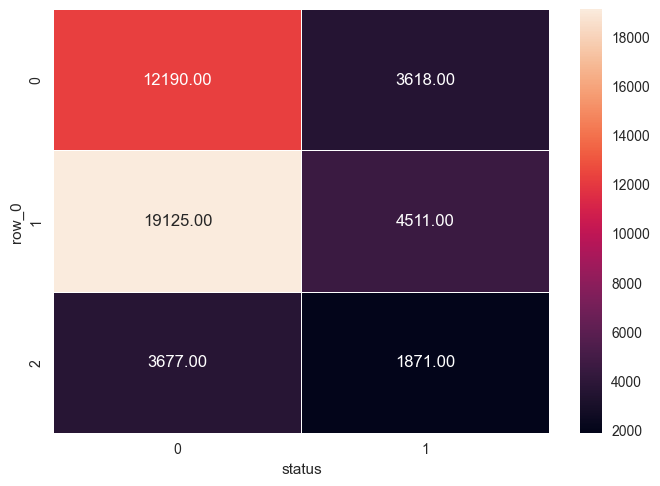

In [85]:
test_interpret = pd.crosstab(clusters, df_clean['status'])
test_interpret = test_interpret.loc[[0,1,2]]
sns.heatmap(test_interpret, annot=True, fmt='.2f',linewidths=0.5)
plt.show()

**Ending comment:** What we end up observing, is that the order of clusters proposed did not match the clusters with a high amount of 'yes's, but rather an inverse relationship: a low number of 'no's. Our interpretations of the principal components are thus not necessarily false, but they would need tuning if we were to use clustering to preprocess and structure actual loan data.

### LDA visualisation of the K-means 

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y = clusters
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)

In [87]:
def plot_lda(axe1, axe2, title, y, lda=lda, X_lda=X_lda, cmap=cmap, figsize=(9,6)):
    axe1, axe2 = axe1-1, axe2-1
    fig,ax = plt.subplots(1,1,figsize=figsize)
    ax.scatter(X_lda[:,axe1], X_lda[:,axe2], c=y, cmap=cmap, s=5)
    ax.set_xlabel(f"LDA component {axe1+1:d} ({lda.explained_variance_ratio_[axe1]:.2%})")
    ax.set_ylabel(f"LDA component {axe2+1:d} ({lda.explained_variance_ratio_[axe2]:.2%})")
    unique_classes = np.unique(y)
    
    for i, clss in enumerate(unique_classes):
        mask = y==clss
        # compute centroids in lda space
        centroid = np.mean(X_lda[mask], axis=0)
        ax.scatter(centroid[0], centroid[1], marker="X", color=cmap.colors[i], edgecolor="black", label=f"Cluster {i}")
    ax.set_title(title)
    ax.legend(markerscale=3)
    return fig,ax

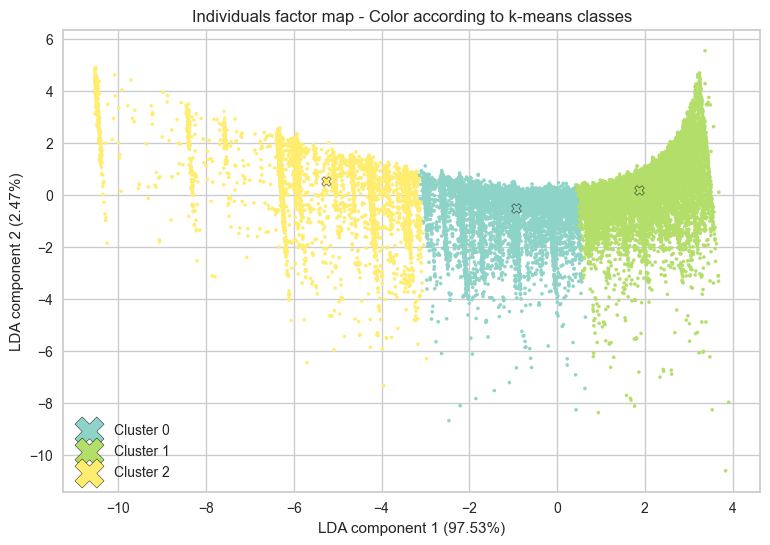

In [88]:
plot_lda(1,2, "Individuals factor map - Color according to k-means classes", clusters)
plt.show()

In [89]:
df_lda_comp = pd.DataFrame(lda.scalings_, columns=np.arange(1,lda.scalings_.shape[1]+1), index=df_quanti.columns)
print("".join([f"LDA {i+1}: {v:.2%}, " for i,v in enumerate(lda.explained_variance_ratio_)]))
print("----")
print(df_lda_comp)

LDA 1: 97.53%, LDA 2: 2.47%, 
----
                   1         2
age        -0.036342 -0.115293
emp_exp     0.015409  0.027421
amnt       -2.670124  2.179134
rate       -0.010730  0.099741
percentage  0.112599 -2.409978
cred_hist   0.019096  0.132477
score      -0.004674  0.017011
Lincome     0.102943 -1.855231


**Comment:** By analysing the LDA components we get a better idea of how the K-means clusters have been constructed. The first LDA axis, which explains $97.67$ % of the variance, is mostly composed of the *amnt* variable, corresponding to the amount of money borrowed. The second LDA axis, accounting for $2.32$ % of the explained variance, is mostly composed of the *amnt*, *percentage* and *income* variables. These variables correspond to resepectively, the amount borrow, how much this represents of the annual income, and the annual income (expressed as a logarithm) of the individual. 

It seems the K-means algorithm has constructed it's 4 clusters mostly based on the amount borrowed, while also taking into account the stress this would put on the individual.

### Choice of number of classes

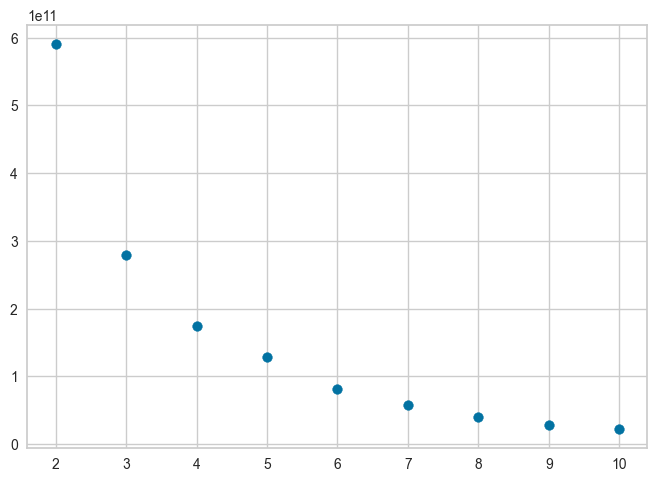

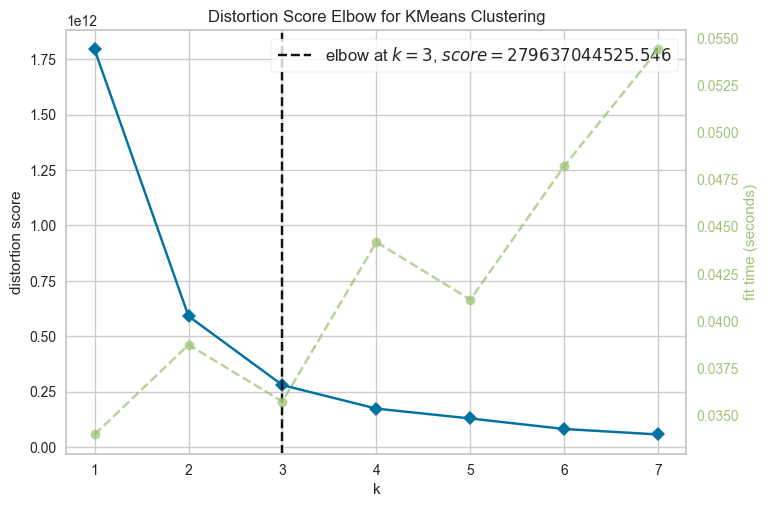

<Figure size 800x550 with 0 Axes>

In [90]:
# By hand

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans.fit(df_quanti)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.scatter(range(2, 11), inertia[1:])
plt.show()


# --- #


# Using yellowbrick

kmeans = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,8))

visualizer.fit(df_quanti)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

plt.savefig("yellowbrick_kmeans.jpg") #<--- maybe add this

**Comment**: The score elbow criteria suggests 3 classes.

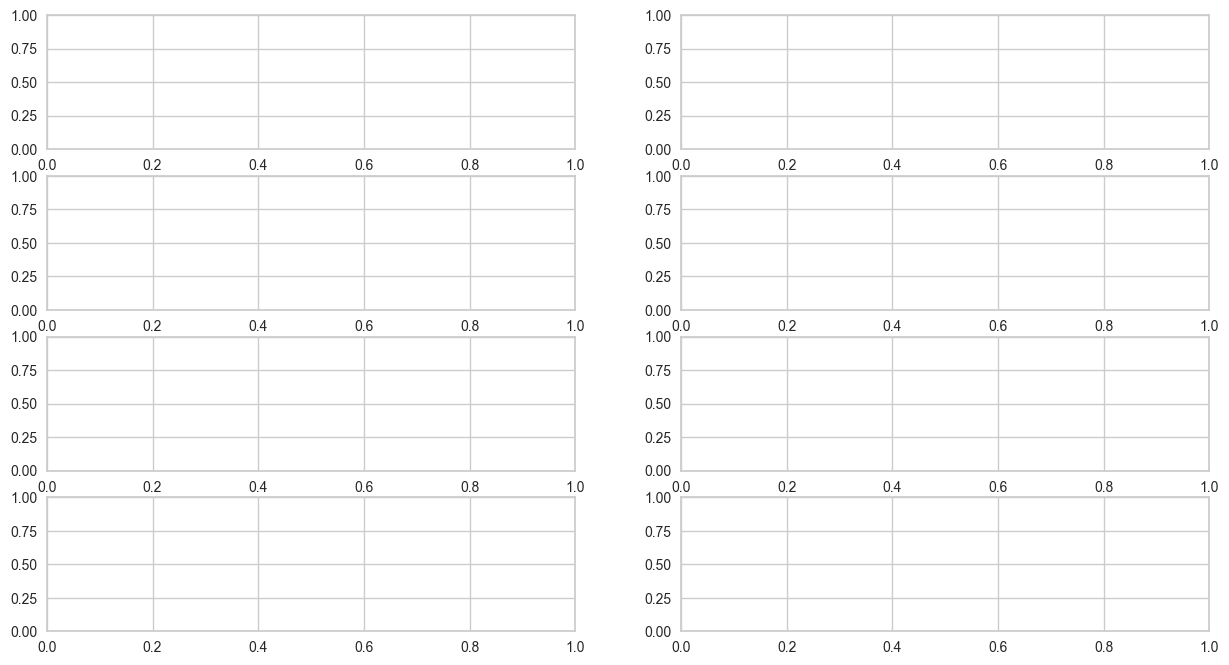

In [91]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))
run = False # replace by True if you want to plot the silhouette score, but long time needed
if run:
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
        q, mod = divmod(k, 2)
        
        # Create SilhouetteVisualizer instance with KMeans instance
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(df_quanti)

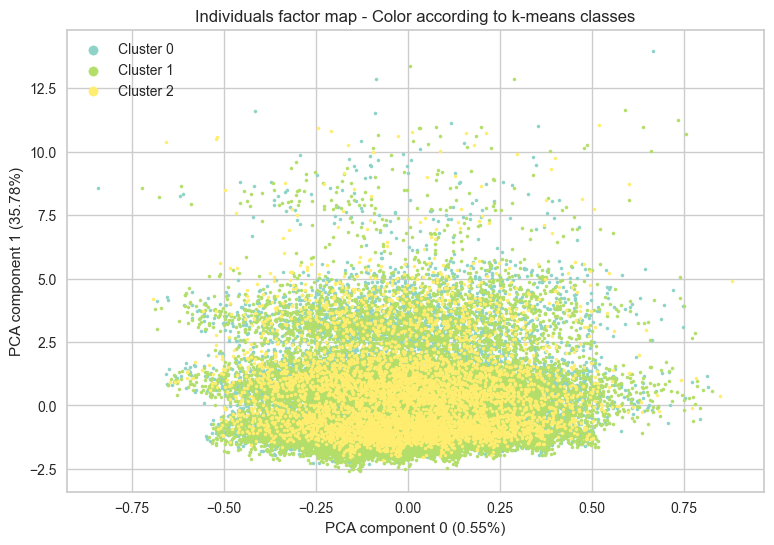

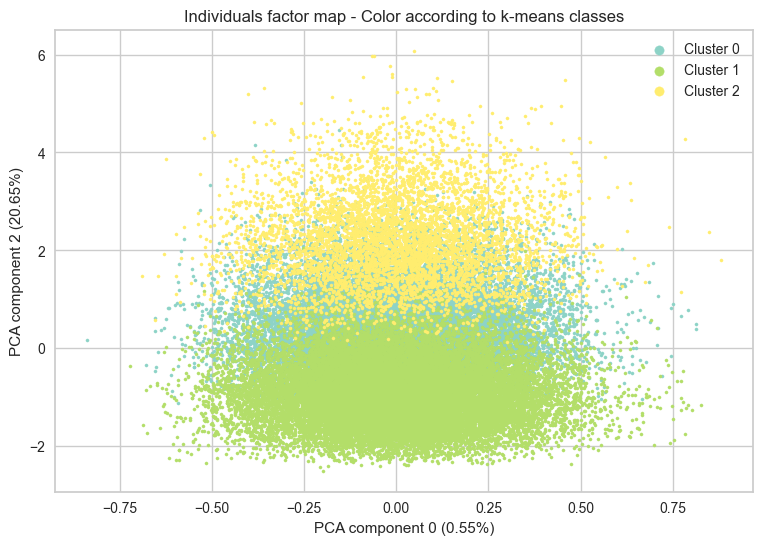

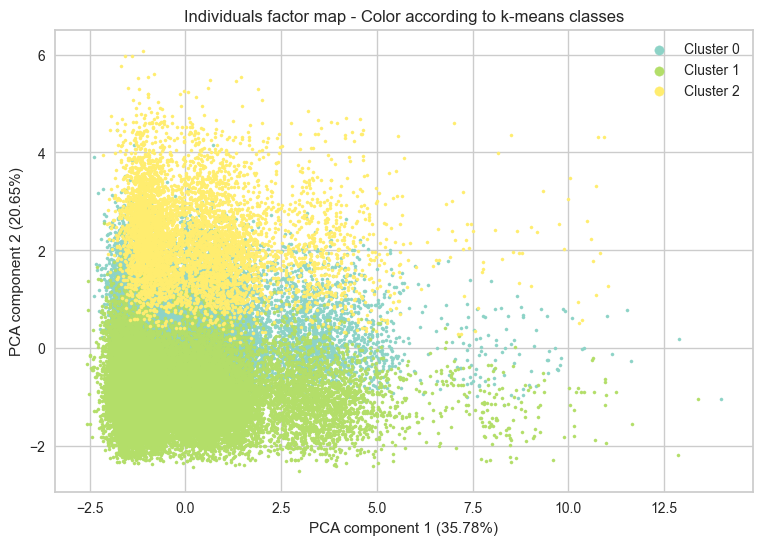

In [92]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm

cmap = plt.get_cmap("Set3", K)  # Choose a colormap with K clusters
colors = [cmap(i/K) for i in range(K)]  # Generate distinct colors
K = 3

kmeans = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_kmeans = kmeans.fit_predict(df_quanti)

plot_pca(0,1,"Individuals factor map - Color according to k-means classes", y=clusters_kmeans)
plot_pca(0,2,"Individuals factor map - Color according to k-means classes", y=clusters_kmeans)
plot_pca(1,2,"Individuals factor map - Color according to k-means classes", y=clusters_kmeans)
plt.show()

In [93]:
df_pca_comp = pd.DataFrame(pca.components_, columns=np.arange(1, pca.components_.shape[1]+1), index=df_quanti.columns)
print("".join([f"PCA {i+1}: {v:.2%}, " for i,v in enumerate(pca.explained_variance_ratio_)]))
print("----")
pd.set_option('display.width', 1000)
df_pca_comp.style

PCA 1: 35.78%, PCA 2: 20.65%, PCA 3: 16.24%, PCA 4: 11.95%, PCA 5: 11.73%, PCA 6: 2.18%, PCA 7: 0.92%, PCA 8: 0.55%, 
----


**Comment**: The 3 K-means classes are well seperated in PCA space when plotting against the 2nd principal component. This component is mostly correlated to the income, credit history, and age of the individuals.

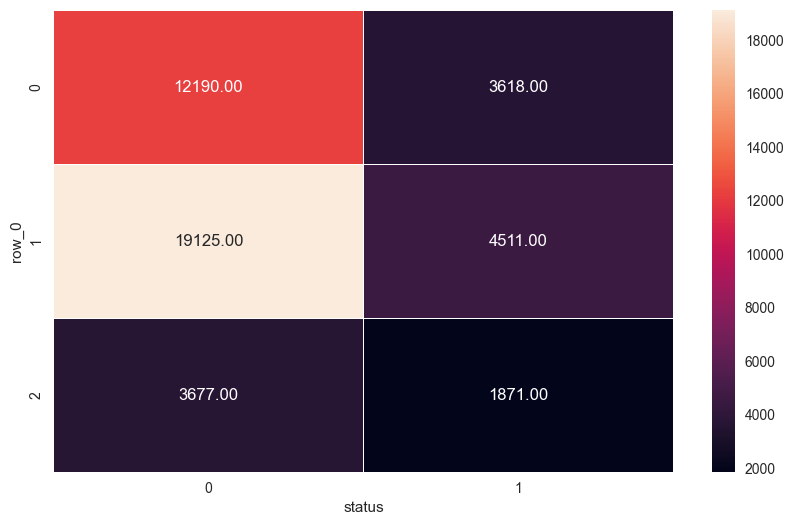

In [94]:
cluster_status = pd.crosstab(clusters_kmeans, df_quali['status'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_status, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

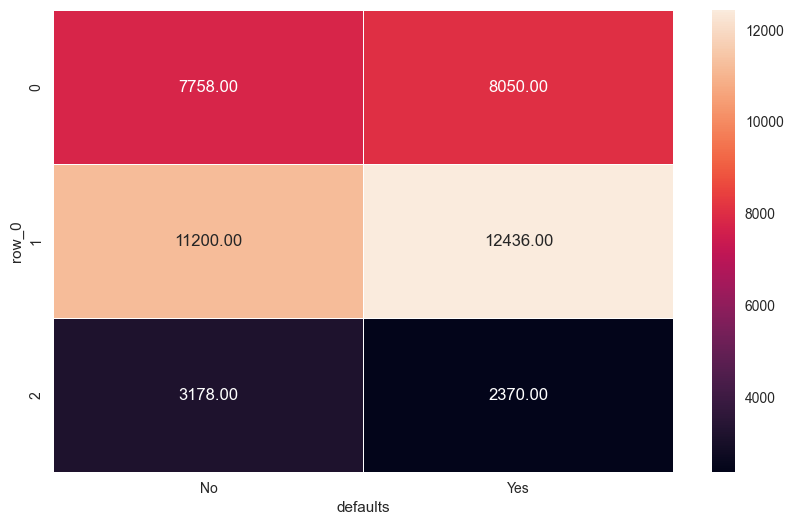

In [95]:
cluster_defaults = pd.crosstab(clusters_kmeans, df_quali['defaults'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_defaults, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

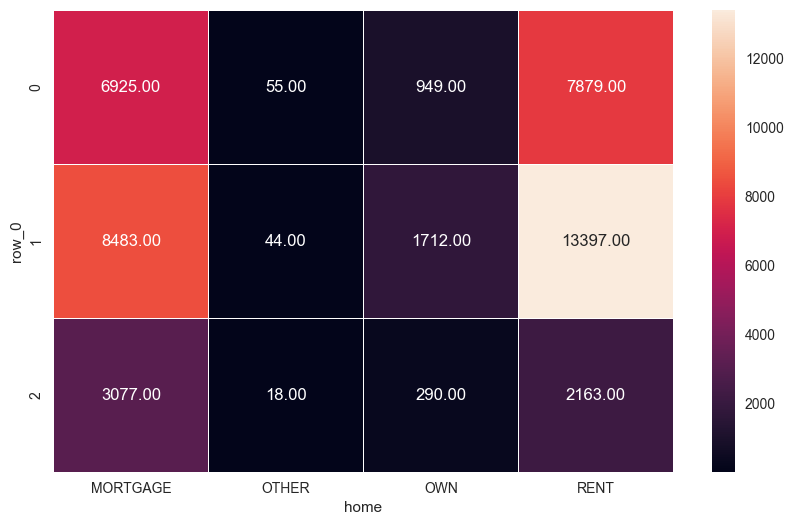

In [96]:
cluster_home = pd.crosstab(clusters_kmeans, df_quali['home'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_home, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

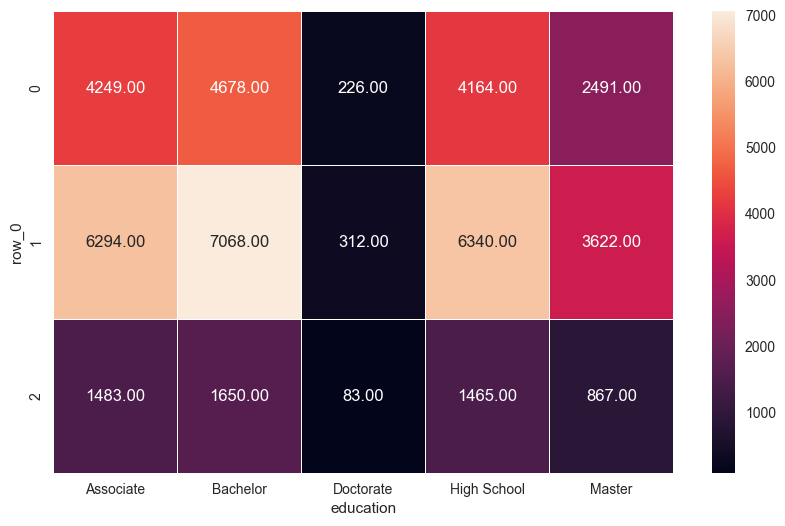

In [97]:
cluster_education = pd.crosstab(clusters_kmeans, df_quali['education'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_education, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

**Comment**: I do not observe any link between the classes and the categorical variables

## Agglomerative Clustering

In [105]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

The Agglomerative Clustering algorithm is a very time-consumming method. Therefore, performing this method on a small subset of the original data is recommended.

In [102]:
# Subset as 1/10 original dataset's size, extracted randomly
idx = np.random.choice(np.arange(len(df_quanti)),size = int(len(df_quanti)/10),replace=False)

In [103]:
if False:
    ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
    visualizer = KElbowVisualizer(ac, k=(1,6))
    
    visualizer.fit(df_quanti[idx])  # Fit the data to the visualizer
    visualizer.show()   
    plt.show()

In [107]:
K = 3

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
ac.fit(df_quanti.iloc[idx])
clusters_ac = ac.labels_

# children = ac.children_
# distances = ac.distances_
# n_observations = np.arange(2, children.shape[0]+2)
# linkage_matrix = np.c_[children, distances, n_observations]

# sch.dendrogram(linkage_matrix, labels=ac.labels_)

# # Cutting the dendrogram to get K classes
# max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
# plt.axhline(y=max_d, c='k')

# plt.title("Dendrogram with Ward linkage")
# plt.show()

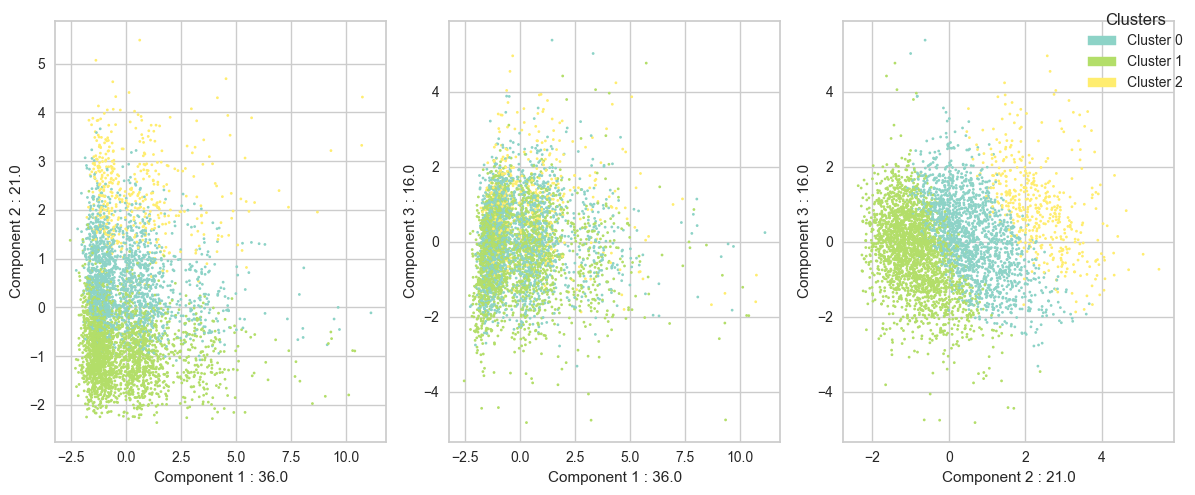

In [108]:

fig,axs = plt.subplots(1,3,figsize=(12,5))

sc=axs[0].scatter(X_pca[idx,0],X_pca[idx,1],c= clusters_ac, s=1, linewidths=1, cmap=cmap)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[idx,0],X_pca[idx,2],c=clusters_ac, s=1, linewidths=1, cmap=cmap)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[idx,1],X_pca[idx,2],c=clusters_ac, s=1, linewidths=1, cmap=cmap)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")


patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(K)]
fig.legend(handles=patches, title="Clusters", loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.show()

**Comment**: The classes given by CAH and K-means methods are quitely similar. We would validate this observation by performing a correspondence analysis to comparing these 2 repartitions.

In [110]:
def clustering_comparison(cluster1, method1, cluster2, method2):
    tab = pd.crosstab(cluster1,cluster2)
    ca = prince.CA(n_components=2)
    ca = ca.fit(tab)
    # Get row (true labels) and column (predicted clusters) coordinates
    row_coords = ca.row_coordinates(tab)
    col_coords = ca.column_coordinates(tab)
    
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot row points (GMM Clusters)
    ax.scatter(row_coords[0], row_coords[1], color='blue', label=method2, marker="o")
    
    # Plot column points (K-Means Clusters)
    ax.scatter(col_coords[0], col_coords[1], color='red', label=method1, marker="s")
    
    # Add text labels for row points (GMM)
    for i, txt in enumerate(tab.index):
        ax.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], str(txt), fontsize=12, color='blue')
    
    # Add text labels for column points (K-Means)
    for i, txt in enumerate(tab.columns):
        ax.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], str(txt), fontsize=12, color='red')
    
    # Formatting
    ax.axhline(0, color='black', linewidth=0.5, linestyle="dashed")
    ax.axvline(0, color='black', linewidth=0.5, linestyle="dashed")
    ax.set_xlabel(f"Dim 1 ({np.round(ca.percentage_of_variance_[0], 2)}%)")
    ax.set_ylabel(f"Dim 2 ({np.round(ca.percentage_of_variance_[1], 2)}%)")
    ax.set_title("CA Factor Map: Comparing "+ method2 +" and "+method1)
    ax.legend()
    plt.grid(True)
    
    # Show plot
    plt.show()

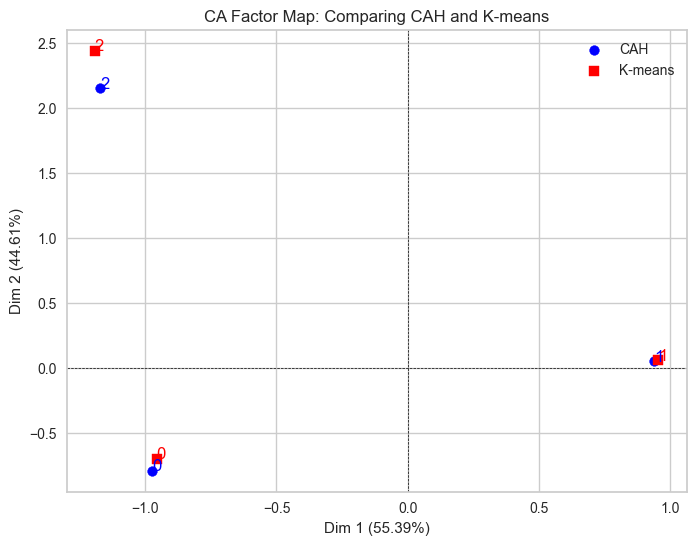

In [111]:
clustering_comparison(clusters_kmeans[idx],"K-means",clusters_ac, "CAH")

**Comment**: The previous observation is validated as, on the graphe of Correspondence Analysis, the classes of 2 cluster K-means and Agglomerative Clustering are close pair by pair.

## Gaussien Mixture Model

In [128]:
def plotGMM(gmm, data, n_clusters=6):
    gmm.fit(data)
    clusters_gmm = gmm.predict(data)
    
    ax = plt.gca()
    ax.axis('equal')
    cmap = plt.get_cmap('Set3', n_clusters)
    
    # plot the input data
    ax.scatter(data[:, 0], data[:, 1], c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
    
    # w_factor = 0.2 / gmm.weights_.max()
    for i in range(n_clusters):
        mean = gmm.means_[i,:2]
        covariance = gmm.covariances_[i,:2,:2]
        w = gmm.weights_[i]
        draw_ellipse(mean, covariance, w, ax, cmap.colors[i])

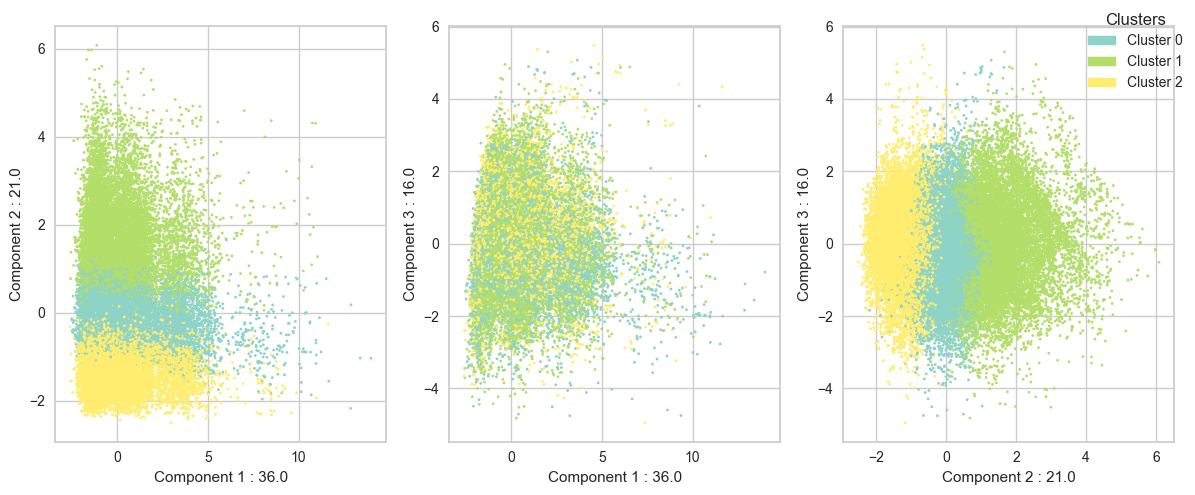

In [129]:
from sklearn.mixture import GaussianMixture

K = 3

gmm = GaussianMixture(n_components=K, n_init=3)
clusters_gmm = gmm.fit_predict(df_quanti)

# --- #
fig,axs = plt.subplots(1,3,figsize=(12,5))

sc=axs[0].scatter(X_pca[:,0],X_pca[:,1],c= clusters_gmm, s=1, linewidths=1, cmap=cmap)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[:,0],X_pca[:,2],c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[:,1],X_pca[:,2],c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")


# patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(K)]
patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(K)]
fig.legend(handles=patches, title="Clusters", loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.show()

**Comment**: The classes given by GMM are different from those given by K-means and CAH. In particular, the classes are separted only by the axe 2 on pca plan. This axis is positively correlated with age and negatively correlated with income, credit history. The individuals in class 2, with high coordinates on the axe 2, should indicate older people with low income and short credit history, while class 2, with low coordinates on the axe 0, should regroup younger people with high income and long credit history.

     count      mean       std   min   25%   50%   75%   max
0  16382.0  0.141340  0.043589  0.02  0.11  0.14  0.17  0.37
1  12596.0  0.235240  0.083986  0.03  0.17  0.23  0.29  0.66
2  16014.0  0.062971  0.028377  0.00  0.04  0.06  0.08  0.22


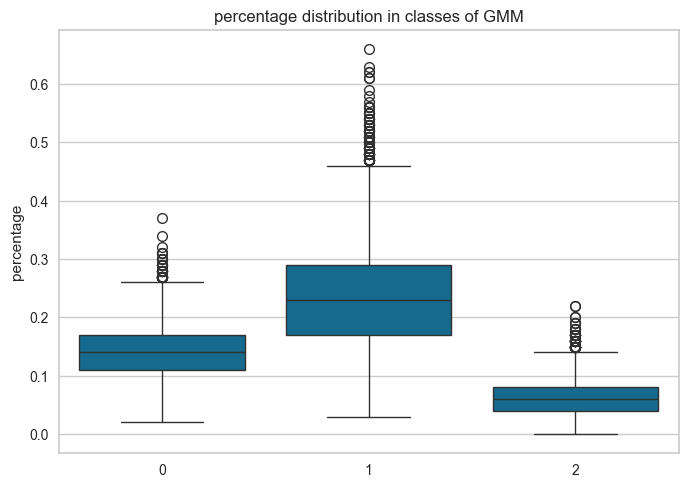

     count          mean          std     min      25%      50%      75%      max
0  16382.0   8787.599683  2661.368535  1000.0   7000.0   9000.0  10000.0  28389.0
1  12596.0  17299.574706  5695.715932  3250.0  14000.0  16000.0  20000.0  35000.0
2  16014.0   4327.805108  2043.118184   500.0   2875.5   4000.0   5600.0  16195.0


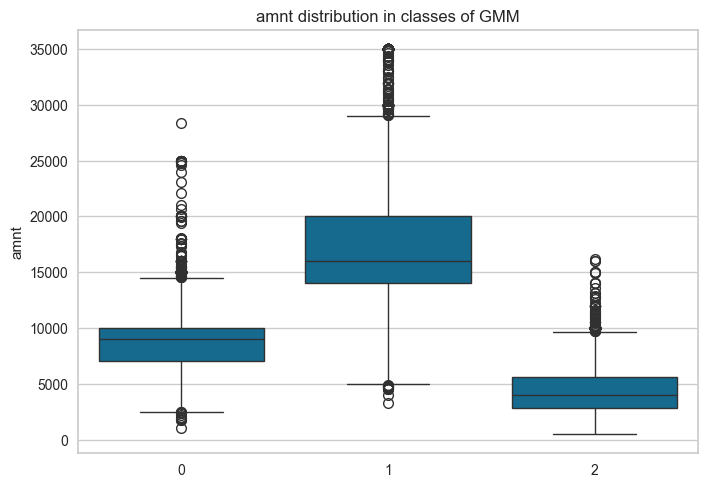

In [132]:
vars=['percentage','amnt']
for var in vars:
    print(df_quanti[var].groupby(clusters_gmm).describe())
    sns.boxplot(x=clusters_gmm, y = df_quanti[var])
    plt.title(var+ " distribution in classes of GMM")
    plt.show()

**Comment**: These statistics are coherent with what we have predicted previously.

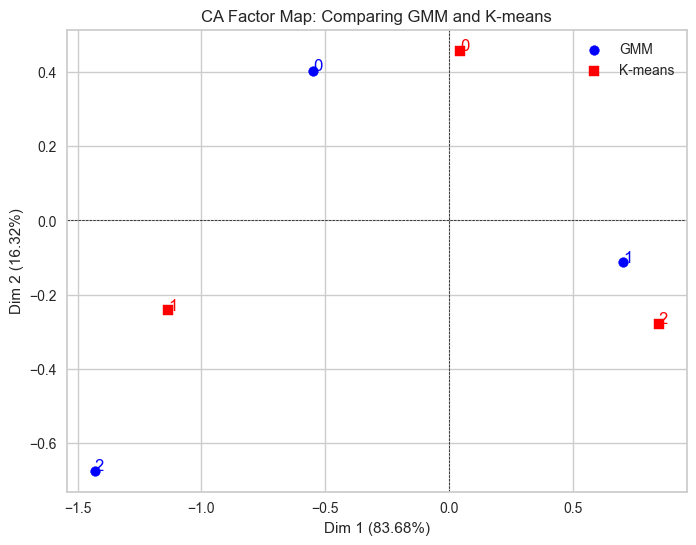

In [133]:
clustering_comparison(clusters_kmeans,"K-means",clusters_gmm, "GMM")

**Comment**: Comparing pair by pair, the classes given by GMM are quite different those of K-means, as well as those given by CAH.

# Loan status prediction

In this section, we will implement a supervised classification method to predict the loan status variable, deciding whether a person is accepted for a loan. We first consider the decision tree as we prioritize the model interpretability.

In [153]:
# Data splitting
df_no_status = df.drop(columns=['status'])
quali_no_status = quali[:-1]
df_dummy = pd.get_dummies(df_no_status,quali_no_status, drop_first=True,dtype=int)

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df_dummy,df['status'],test_size = 0.2, random_state=42)


As we have 36,000 individuals in the training set, finding the optimized hyperparameters for the tree using cross-validation will be a time-consumming task. Therefore, we exact only a subset of the training set to perform the cross validation.

In [155]:
_,X_train_cv,_,y_train_cv = train_test_split(X_train,y_train,test_size=0.1,random_state =42)

In [157]:
param_grid = {
    'max_depth' : [4,5,6,7,None],
    'min_samples_split' : [2,3,4,5,6,7,10],
    'min_samples_leaf' :[ 1,2,4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10,scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train_cv,y_train_cv)
print("Best parameters: ", grid_search.best_params_)
print('Highest accuracy: ',grid_search.best_score_)

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}
Highest accuracy:  0.9161111111111111


In [178]:
# We reconstruct the tree with the optimal parameters obtained by cross validation.
cls_tree  = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=1, min_samples_split=6)
cls_tree.fit(X_train,y_train)
y_pred = cls_tree.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy obtained by the decision tree:", accuracy)

The accuracy obtained by the decision tree: 0.9105555555555556


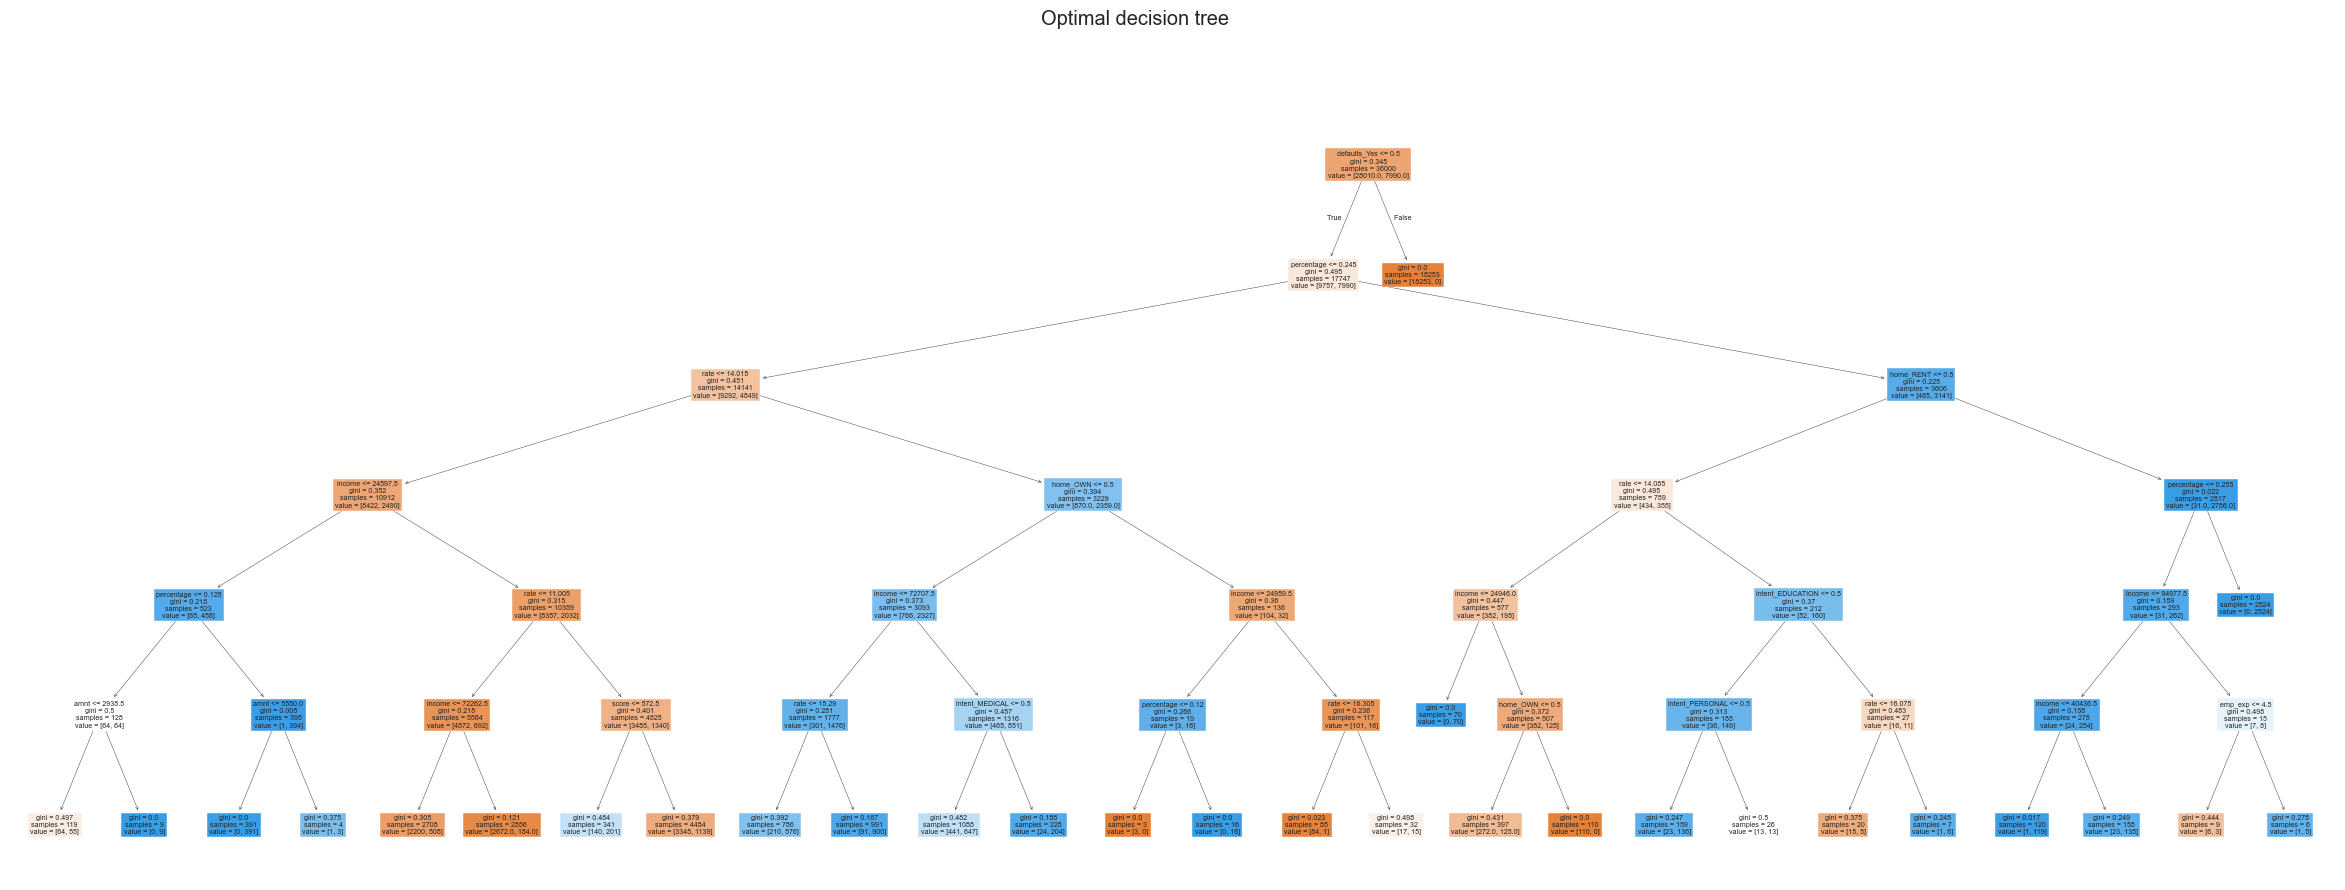

In [172]:
from sklearn.tree import plot_tree
fig,ax = plt.subplots(1,1,figsize=(30,10))
plot_tree(cls_tree, feature_names=df_dummy.columns,filled=True, ax=ax)
plt.suptitle('Optimal decision tree')
plt.show()

**Comment**: By observing the tree plot, we remark that the decisions are mainly based on the history of default, interest rate, annual income, loan intent, demanded amount of loan, and loan amount as a percentage of annual income. The two factors credit score of the person and years of employment experience are included in the model in a moderate level, while the model totally ignore age, length of credit history in years, education:
- At the first node, we see that if a person has made a bankruptcy in the past, he/she will be automatically refused
- At the second note, the more the loan amount is relative to his income, the more likely it is to be approved, this observation is quite counter-intuitive
- The higher the interest rate is, the more chance the loan being approved. This observation reflect the rentability objective of the banque.


# Conclusion